## Impact of weather on the Distribution of Accidents per day

This notebook aims to mirror the methodology used in the previous workflow to obtain a correlation between the weather coonditions and the temporal distribution of accidents per day, and to observe weather the weather conditions can cause a change in the distribution of accidents in each of the 5 time intervals discussed below - 

1. Mid night (12 am to 6 am)
2. Morning (6 am to 12 pm)
3. Afternoon (12 pm to 4 pm)
4. Evening (4 pm to 8 pm)
5. Night (8 pm to 12 pm)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from datetime import time, datetime

warnings.filterwarnings('ignore')

In [2]:
datasets = []
for i in range(2013, 2024):

    file = f"./datasets/crashes_2012-23/crashes_{i}.csv"
    result = pd.read_csv(file)
    result.dropna(subset=['BOROUGH'], inplace=True)
    datasets.append(result)

In [3]:
plt.rcParams['figure.figsize'] = (40,20)

def getPlots(datasets):
    
    for i in range(0, len(datasets)):
        result = datasets[i]
        result["CRASH DATE"] = pd.to_datetime(result["CRASH DATE"])
        result["ACCIDENT_MONTH"] = result["CRASH DATE"].dt.month

        result_grped = result.groupby('ACCIDENT_MONTH').count()['CRASH DATE']

        plt.subplot(3,4,i+1)
        result_grped.plot.bar()
        plt.title(f"Accident numbers per month")
        plt.ylabel("Number of accidents")
        
    plt.show()

In [4]:
times = ["MID NIGHT","MORNING","AFTERNOON","EVENING","NIGHT"]

def custom_time_func(row):

    time1 = time(6,00,00)
    time2 = time(12,00,00)
    time3 = time(16,00,00)
    time4 = time(20,00,00)
    time5 = time(00,00,00)

    val = datetime.strptime(row['CRASH TIME'], "%H:%M").time()

    if val>=time5 and val<time1:
        return "MID NIGHT"
    elif val>=time1 and val<time2:
        return "MORNING"
    elif val>=time2 and val<time3:
        return "AFTERNOON"
    elif val>=time3 and val<time4:
        return "EVENING"
    else:
        return "NIGHT"

In [6]:
for i in range(len(datasets)):
    datasets[i]['TIME'] = datasets[i].apply(custom_time_func, axis=1)

MID NIGHT


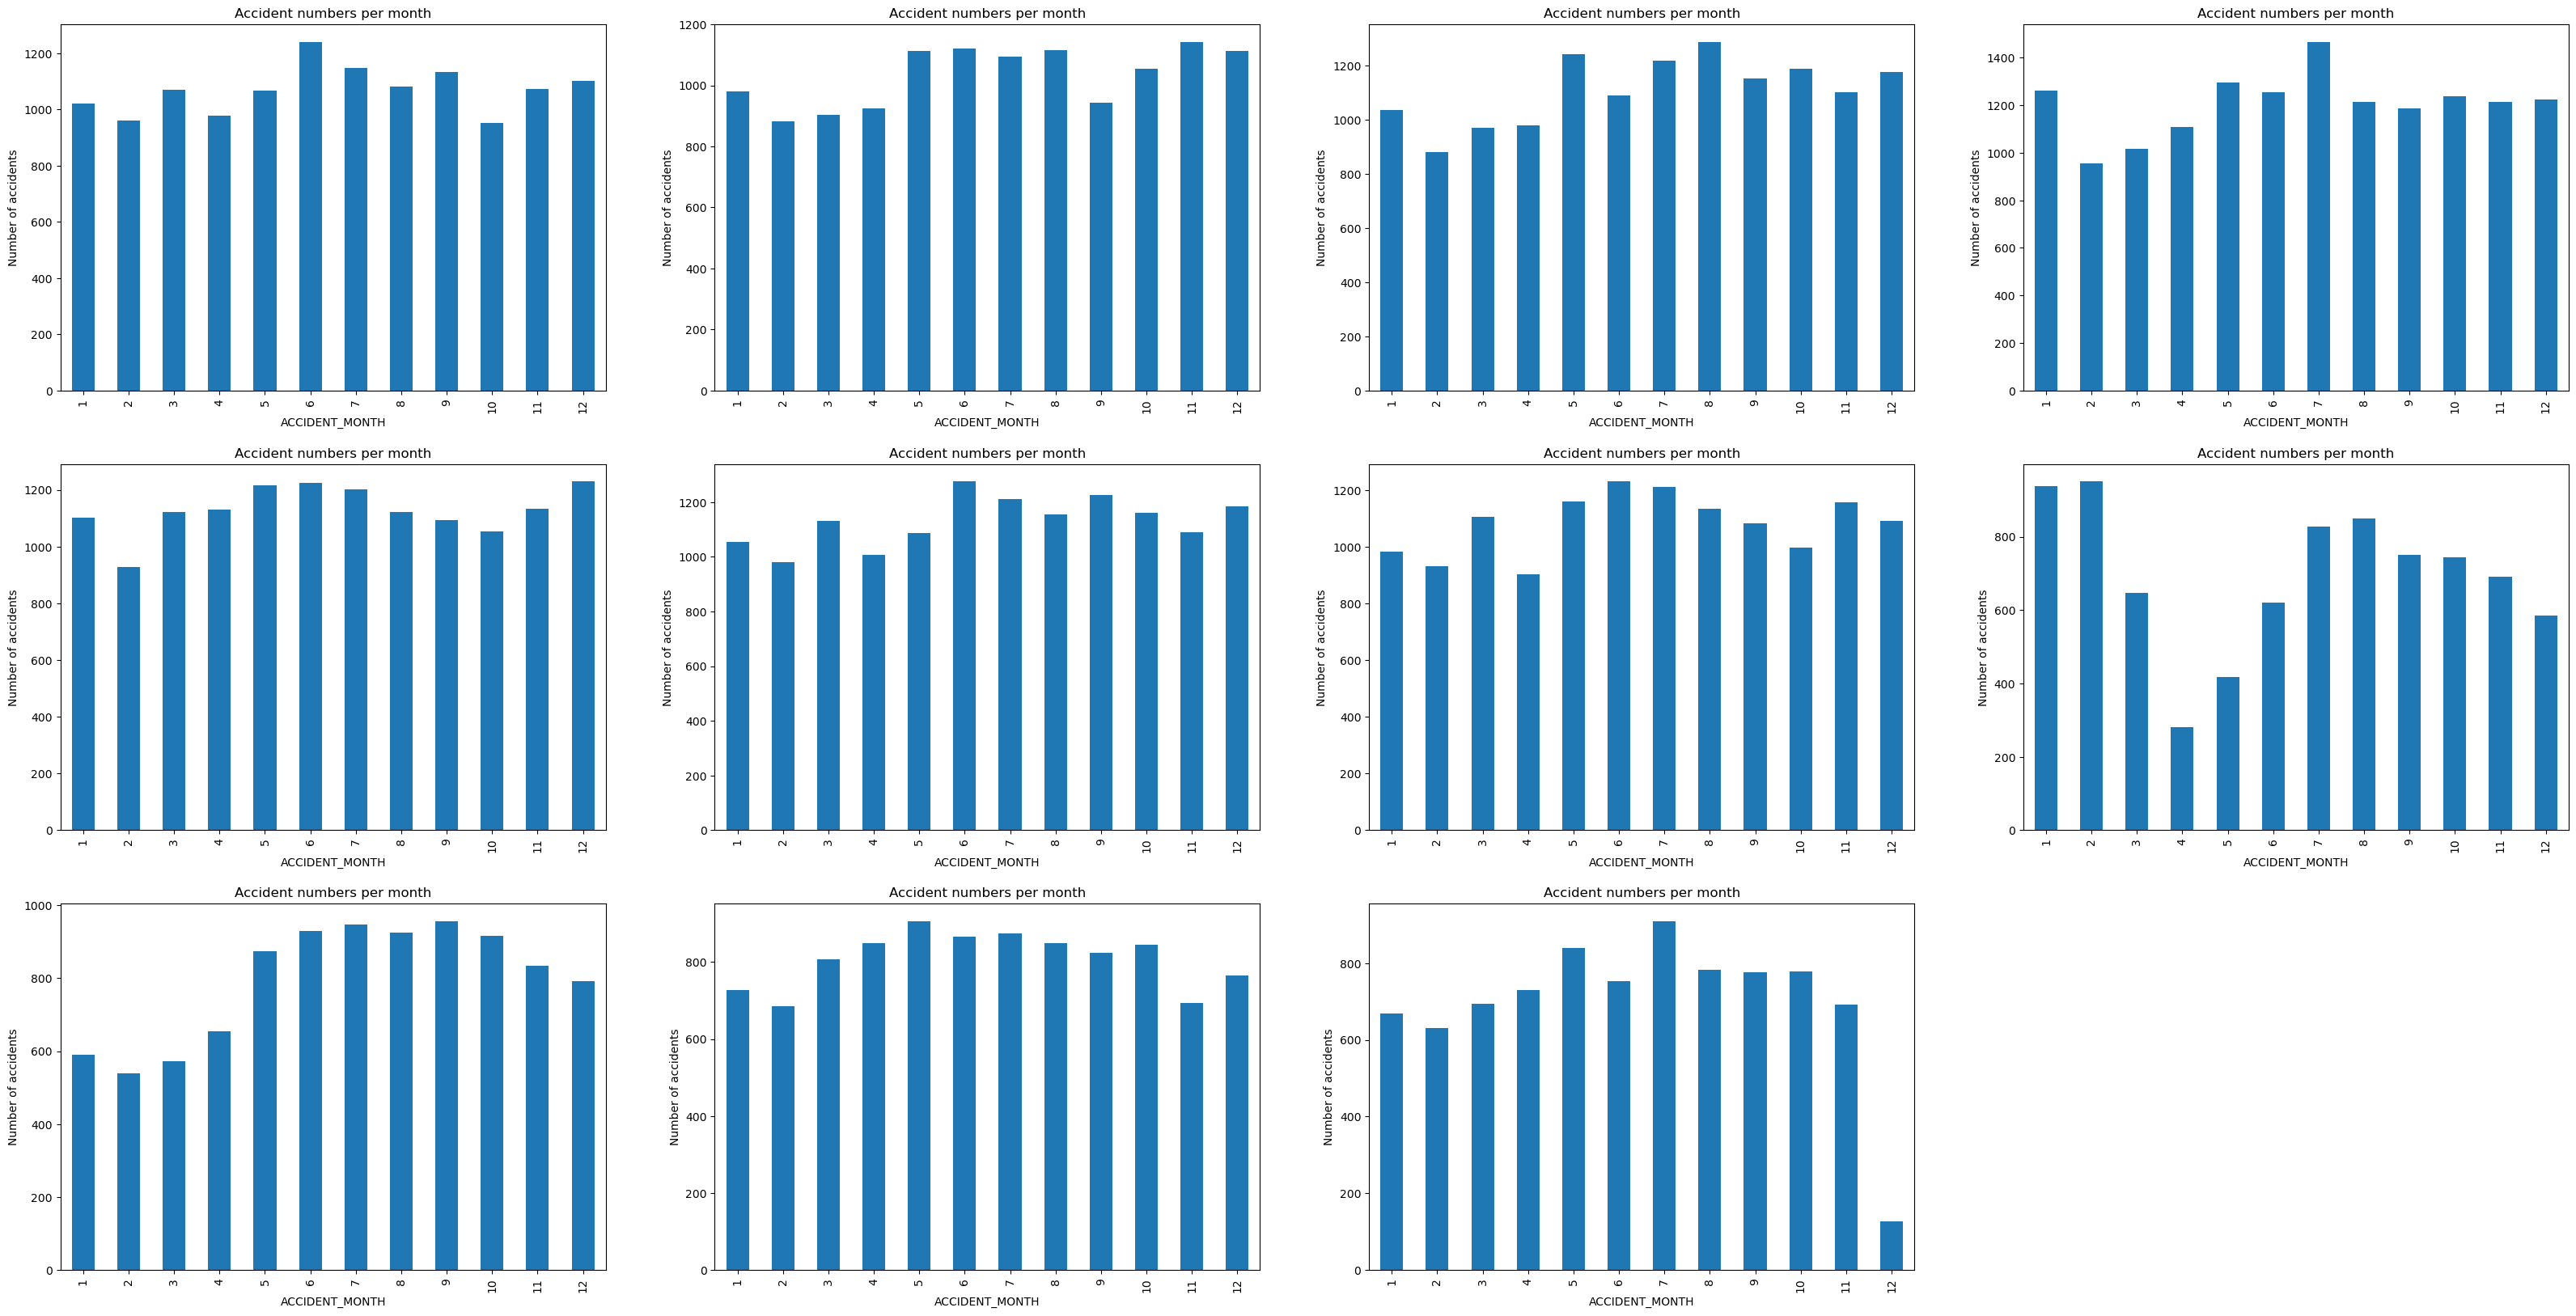

MORNING


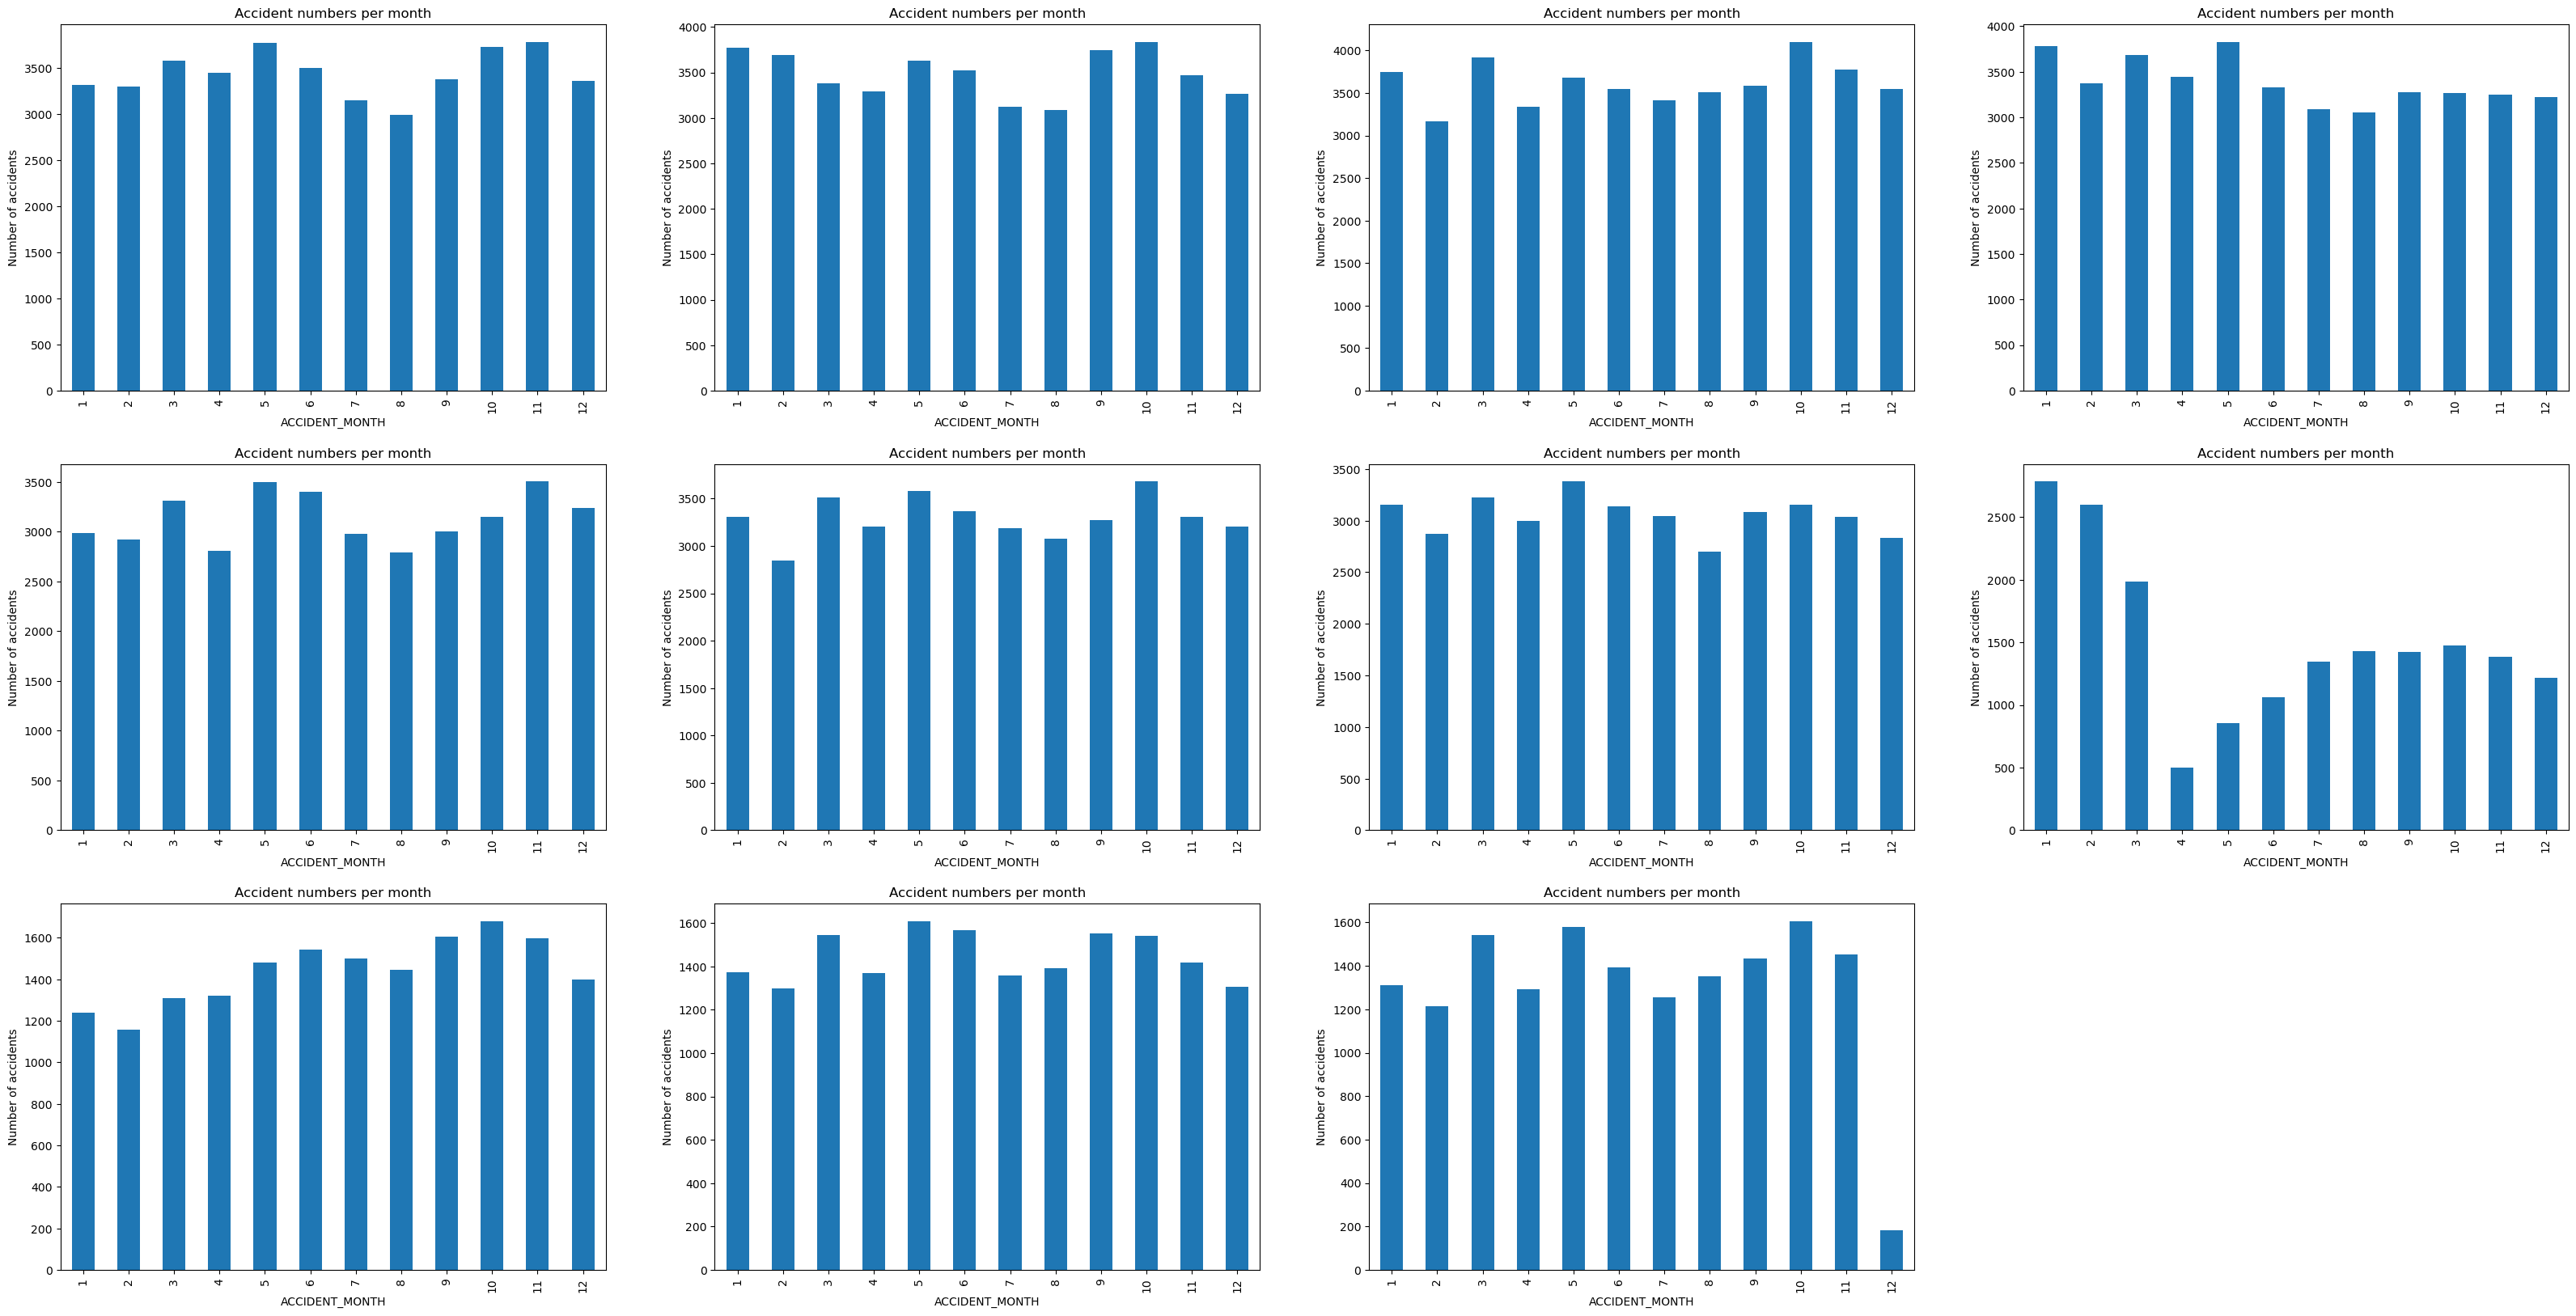

AFTERNOON


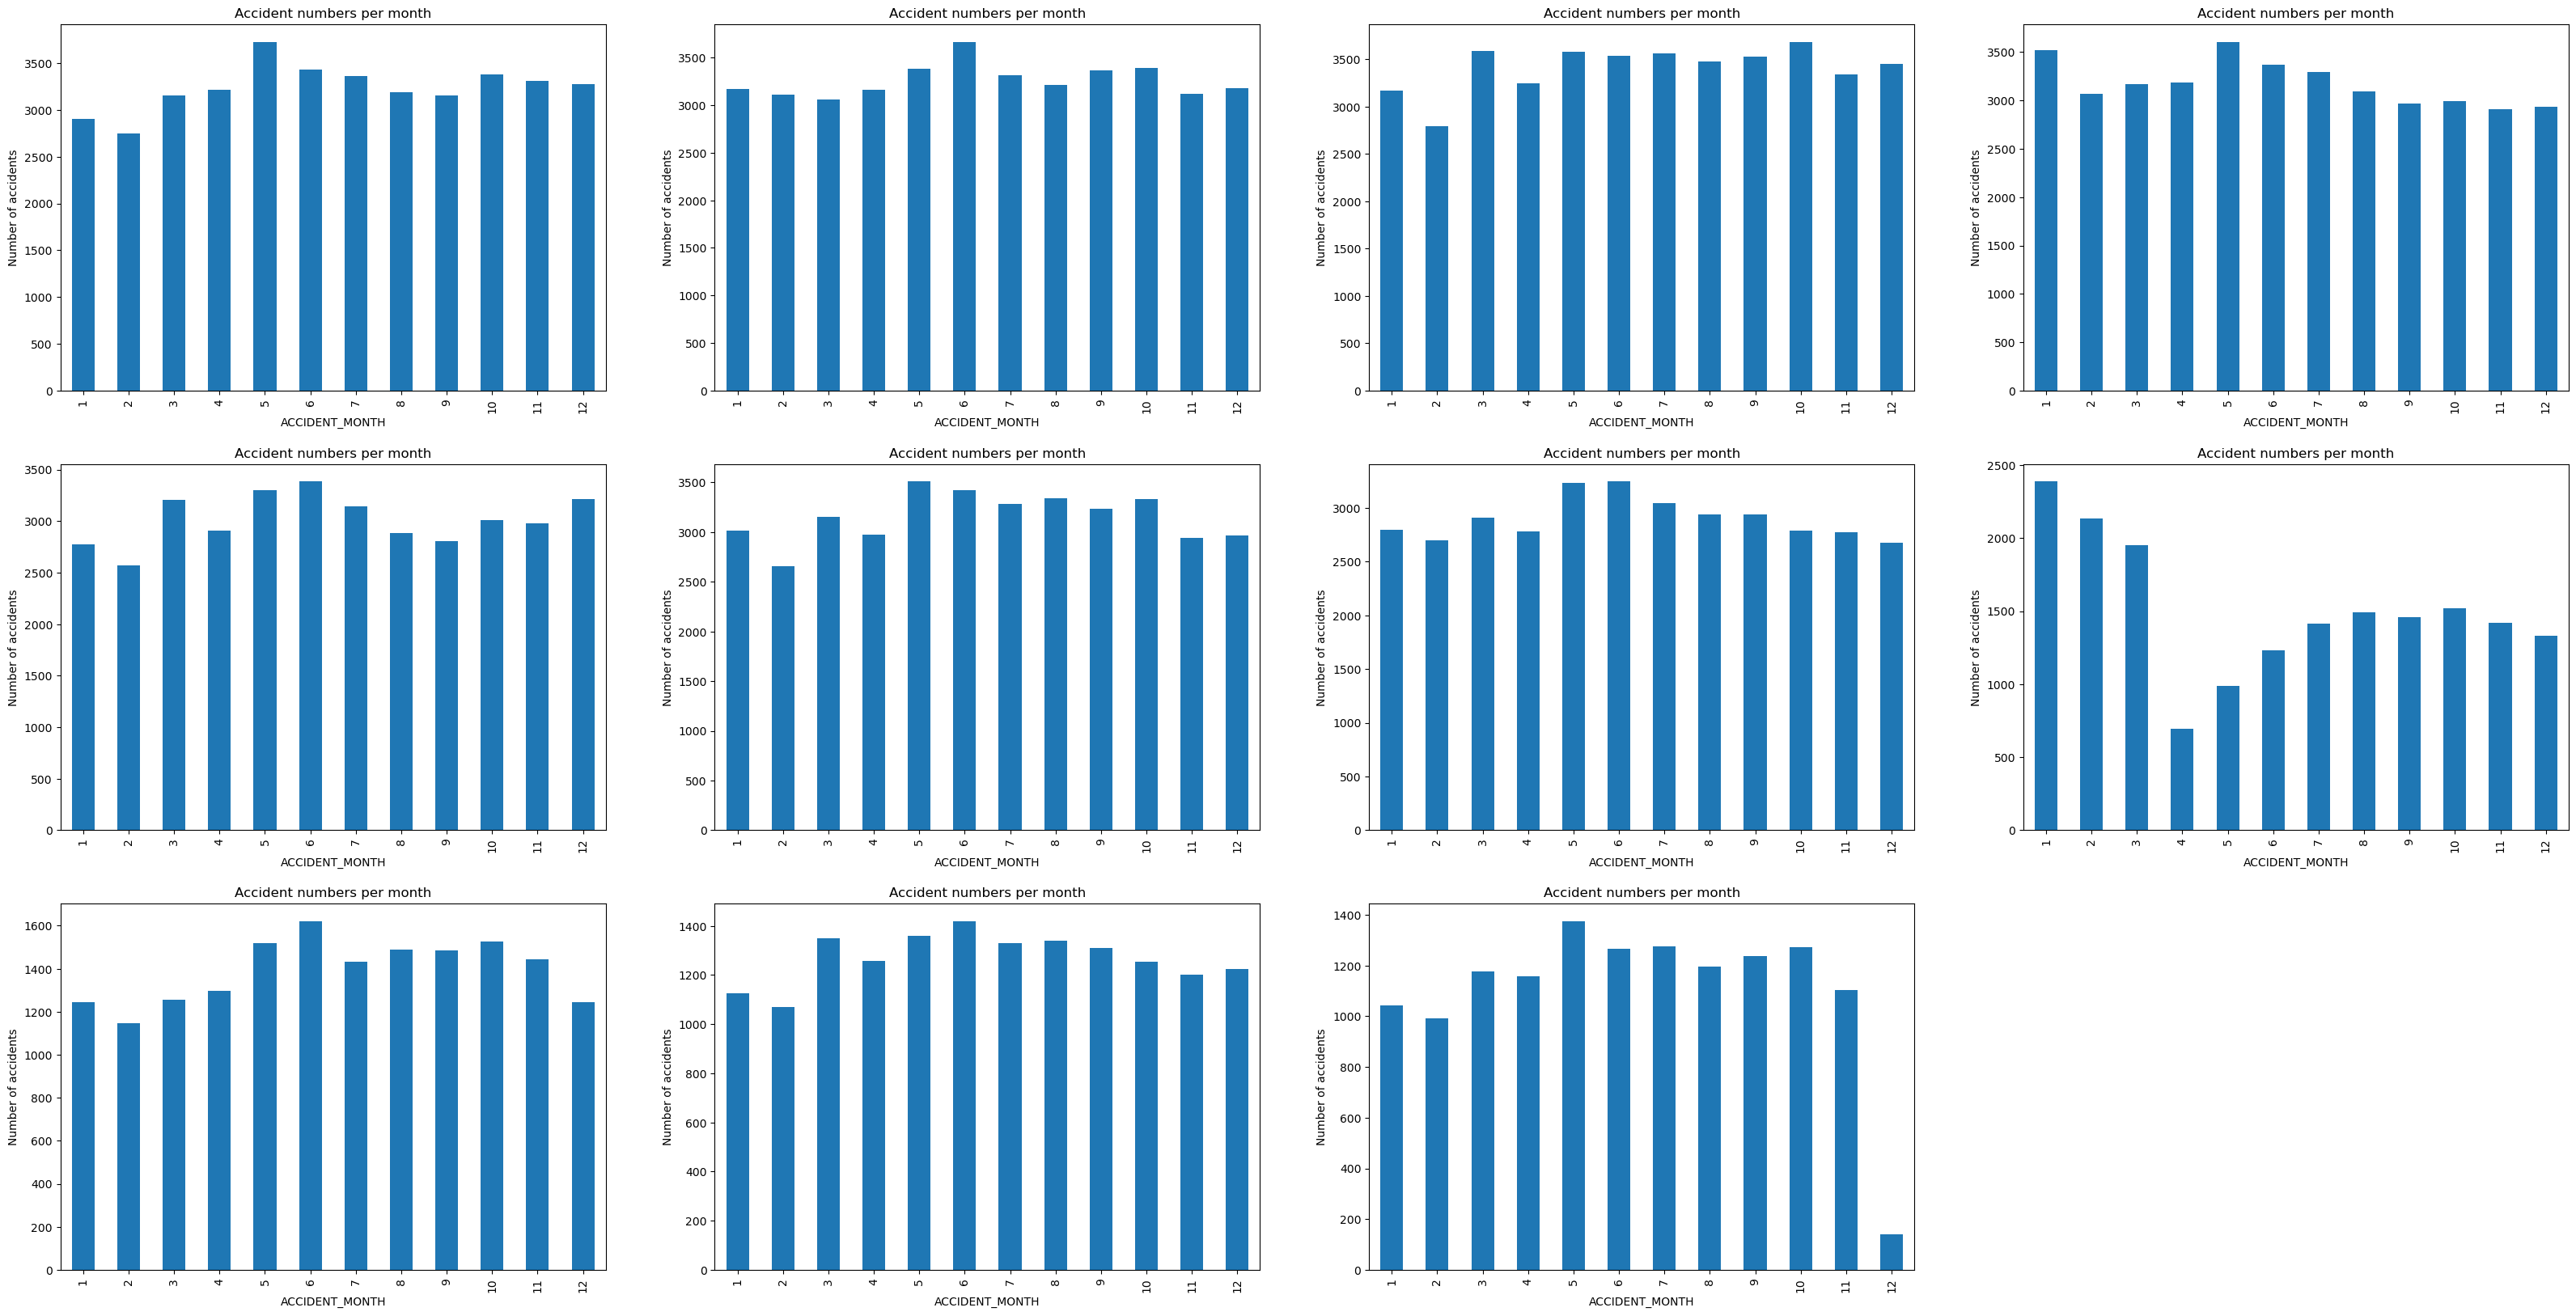

EVENING


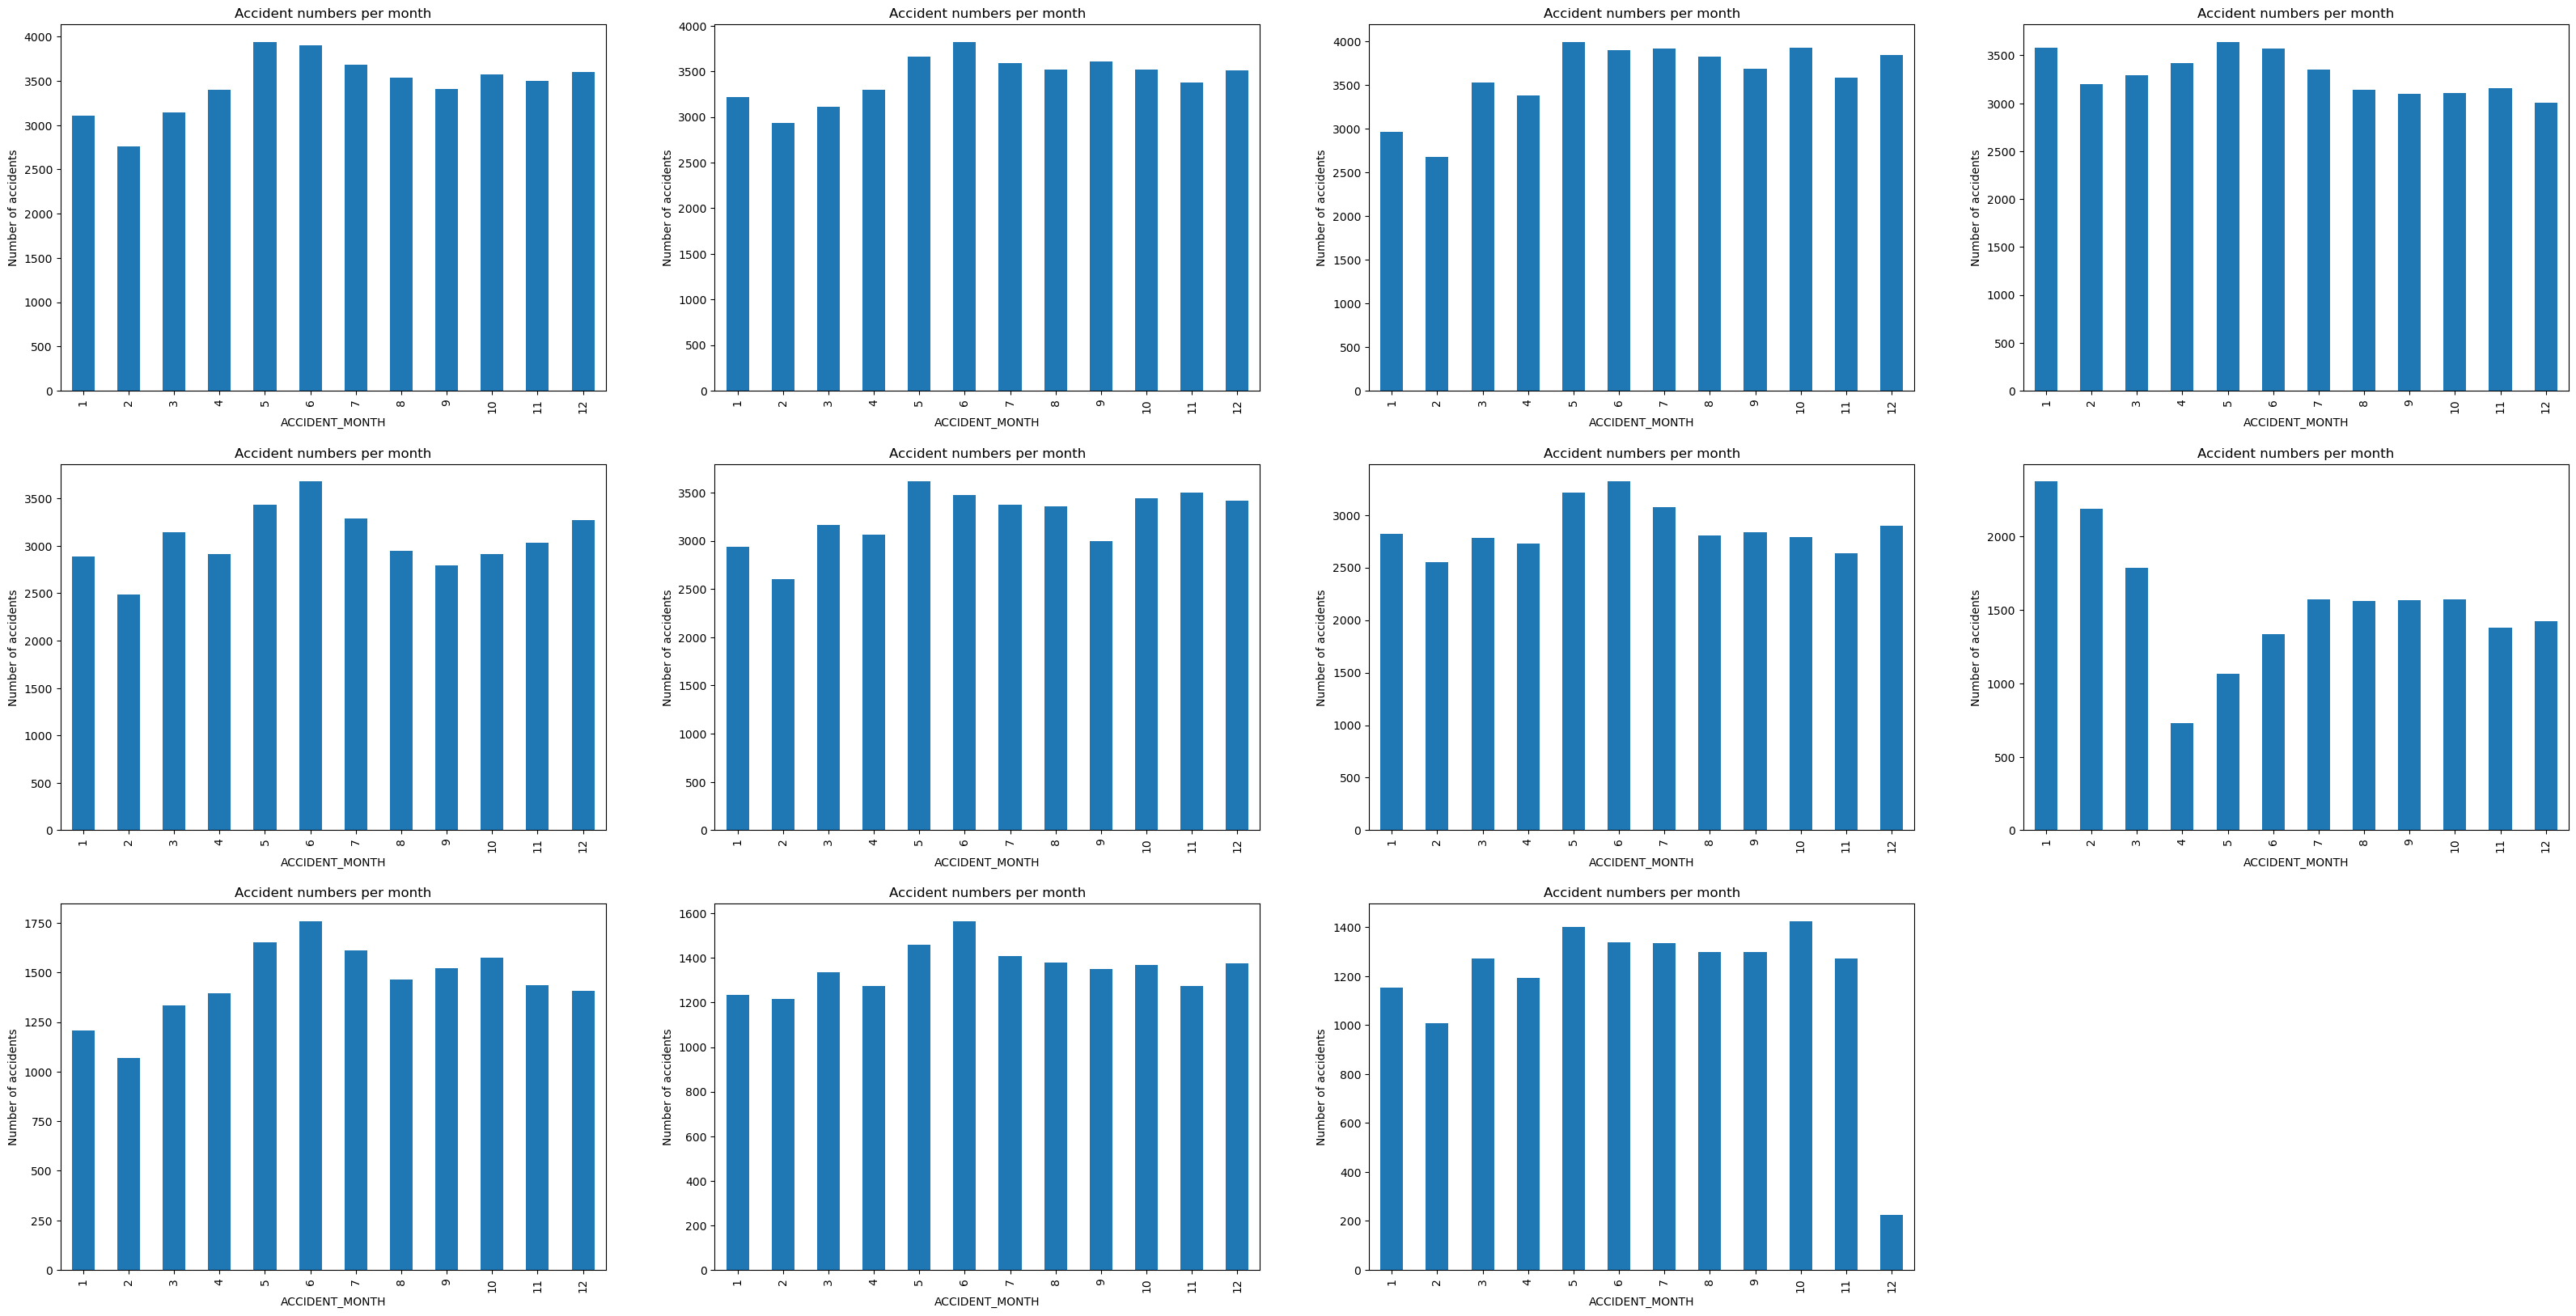

NIGHT


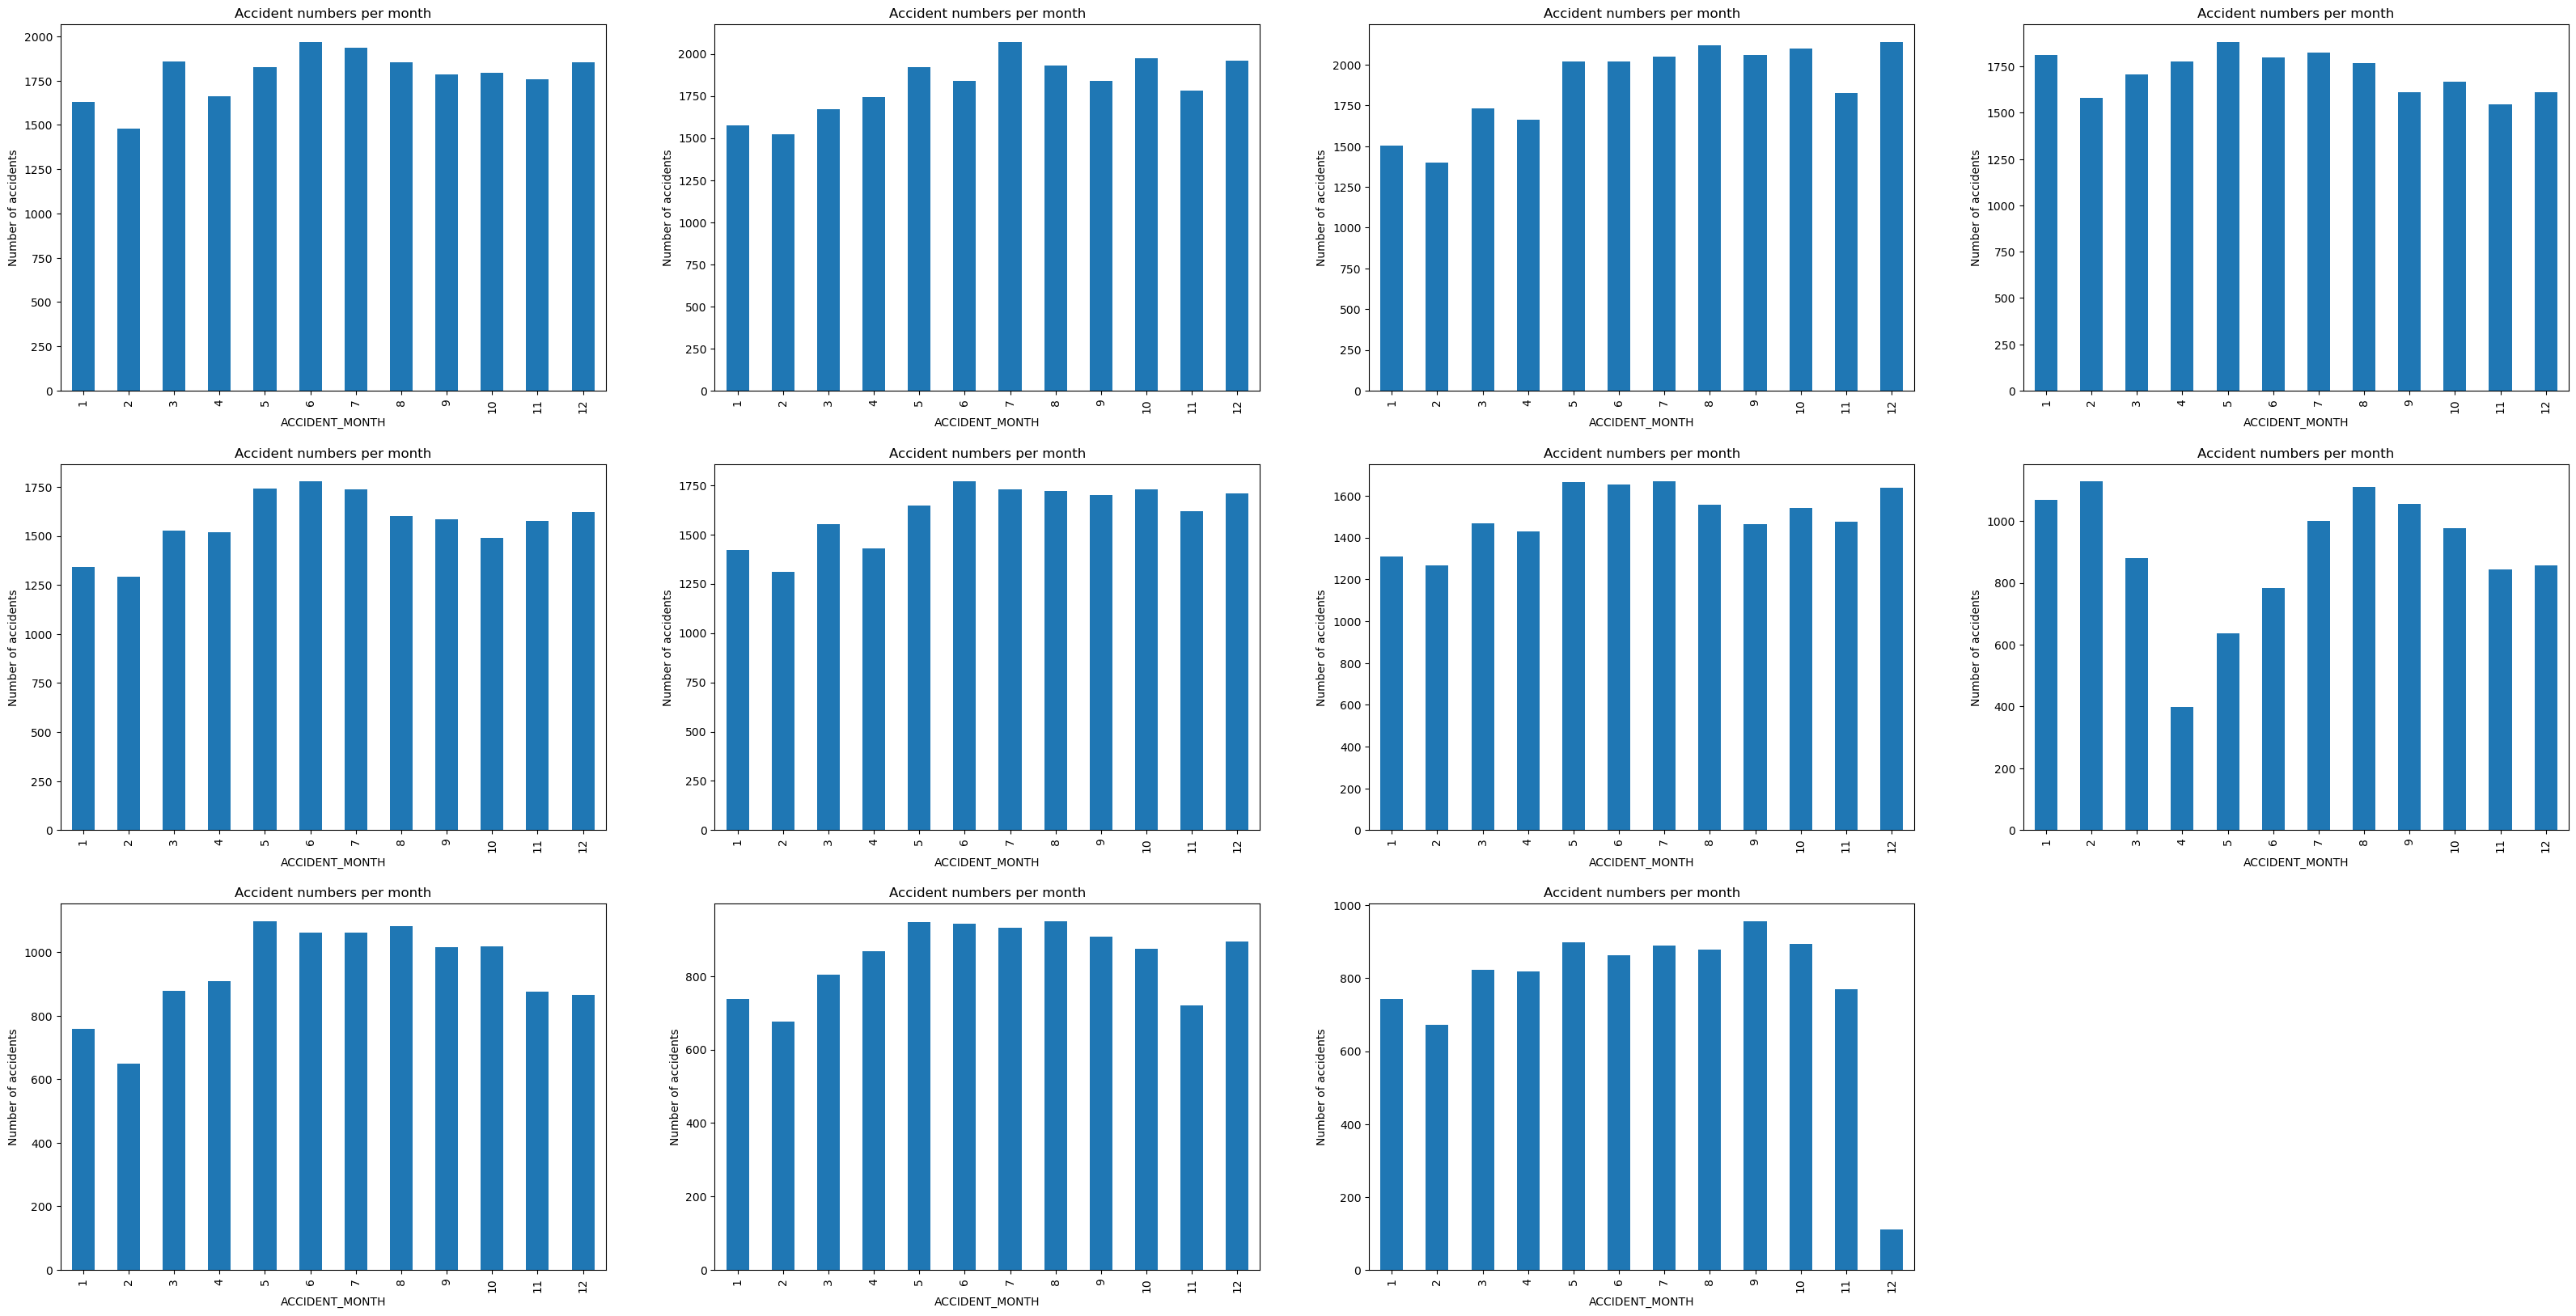

In [7]:
for time in times:
    print(time)
    datasets_temp = []

    for dataset in datasets:
        datasets_temp.append(dataset[dataset['TIME'] == time])
    
    getPlots(datasets_temp)

Similar to previous, a seasonal trend is observed in the data for each of the 5 time intervals.

We carry out a similar approach to the previous, with the exception that we now observe the trends with respect to time, rather than the accident types.

In [8]:
rainfall_jfk = pd.read_csv("./datasets/jfk.csv")
rainfall_lg = pd.read_csv("./datasets/LaGuardia.csv")
rainfall_cp = pd.read_csv("./datasets/Central Park.csv")
rainfall_cp

Date  Value  Anomaly
0   201201   3.23    -0.41
1   201202   1.37    -1.82
2   201203   0.96    -3.33
3   201204   3.56    -0.53
4   201205   5.37     1.41
..     ...    ...      ...
91  201908   3.70    -0.86
92  201909   0.95    -3.36
93  201910   6.16     1.78
94  201911   1.95    -1.63
95  201912   7.09     2.71

[96 rows x 3 columns]

In [9]:
temp_jfk = pd.read_csv("./datasets/jfk_temp.csv")
temp_lg = pd.read_csv("./datasets/lg_temp.csv")
temp_cp = pd.read_csv("./datasets/cp_temp.csv")
temp_cp

Date  Value  Anomaly
0   201201   37.8      4.1
1   201202   41.4      5.6
2   201203   51.4      8.6
3   201204   55.3      1.7
4   201205   65.6      2.4
..     ...    ...      ...
91  201908   75.5     -0.5
92  201909   70.4      1.2
93  201910   59.9      2.0
94  201911   43.9     -4.1
95  201912   38.4     -0.6

[96 rows x 3 columns]

In [10]:
rainfall = rainfall_cp
rainfall.drop(columns=['Anomaly'], inplace=True)
rainfall['Value'] = round((rainfall_cp['Value']+rainfall_jfk['Value']+rainfall_lg['Value'])/3, 2)
rainfall

Date  Value
0   201201   2.64
1   201202   1.32
2   201203   1.03
3   201204   3.24
4   201205   5.71
..     ...    ...
91  201908   3.33
92  201909   0.90
93  201910   5.48
94  201911   1.70
95  201912   7.43

[96 rows x 2 columns]

In [11]:
temp = temp_cp
temp.drop(columns=['Anomaly'], inplace=True)
temp['Value'] = round((temp_cp['Value']+temp_jfk['Value']+temp_lg['Value'])/3, 2)
temp

Date  Value
0   201201  37.60
1   201202  41.17
2   201203  50.37
3   201204  55.17
4   201205  65.23
..     ...    ...
91  201908  76.17
92  201909  70.63
93  201910  60.47
94  201911  44.10
95  201912  38.70

[96 rows x 2 columns]

In [12]:
daylights = []

for j in range(2013, 2020):
    file = f"./datasets/Book_{j}.csv"
    df = pd.read_csv(file)
    
    l = {}

    for i in range(1,13):
        duration = pd.to_datetime(df.iloc[:, i], format="%H:%M").dt.hour*60 + pd.to_datetime(df.iloc[:, i], format="%H:%M").dt.minute
        dic = {'Date':j*100+i, 'Value': int(duration.mean())}
        daylights.append(dic)

daylights = pd.DataFrame(daylights)
daylights

Date  Value
0   201301    579
1   201302    641
2   201303    718
3   201304    799
4   201305    867
..     ...    ...
79  201908    824
80  201909    747
81  201910    667
82  201911    596
83  201912    559

[84 rows x 2 columns]

In [13]:
def getTransformedDataFrame(datasets):
    dataset = []
    for i in range(2013, 2020):
    
        result = datasets[i-2013]
        result.dropna(subset=['BOROUGH'], inplace=True)
        
        result["CRASH DATE"] = pd.to_datetime(result["CRASH DATE"])
        result["ACCIDENT_MONTH"] = result["CRASH DATE"].dt.month

        result_grped = result.groupby('ACCIDENT_MONTH').count()['CRASH DATE']

        for j in range(1,13):
            dictionary = {'Year':i, 'Month':j, 'Accidents':result_grped[j], 'Precipitation': rainfall.loc[rainfall['Date'] == 100*i+j].iloc[0]['Value'], 
                        'Temperature':temp.loc[temp['Date'] == 100*i+j].iloc[0]['Value'], 'Daylight':daylights.loc[daylights['Date'] == 100*i+j].iloc[0]['Value']}  
            dataset.append(dictionary)

    transformed_df = pd.DataFrame(dataset)
    return transformed_df

In [14]:
transformed_df = getTransformedDataFrame(datasets)
transformed_df

Year  Month  Accidents  Precipitation  Temperature  Daylight
0   2013      1      11979           2.60        35.60       579
1   2013      2      11247           3.40        34.43       641
2   2013      3      12810           2.55        40.50       718
3   2013      4      12712           1.42        52.40       799
4   2013      5      14337           5.68        62.37       867
..   ...    ...        ...            ...          ...       ...
79  2019      8      11132           3.33        76.17       824
80  2019      9      11409           0.90        70.63       747
81  2019     10      11265           5.48        60.47       667
82  2019     11      11079           1.70        44.10       596
83  2019     12      11133           7.43        38.70       559

[84 rows x 6 columns]

In [15]:
def getDualPlot(df_to_plot, column):
    plt.rcParams['figure.figsize'] = (8,4)
    fig, ax = plt.subplots()

    ax.bar(df_to_plot['Month'], df_to_plot['Accidents'])

    ax2 = ax.twinx()
    ax2.plot(df_to_plot['Month'], df_to_plot[column], color='k', marker='o')
    ax2.set_ylabel("Precipitation")

    plt.show()

+-------------------------+
MID NIGHT
Year - 2013
0.7064813250169413
0.5431136894225498
0.4868214706385231


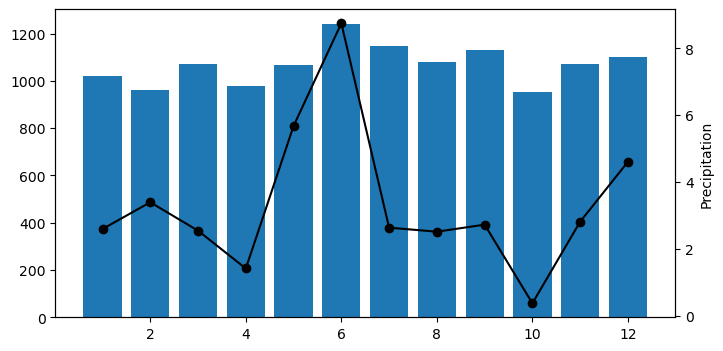

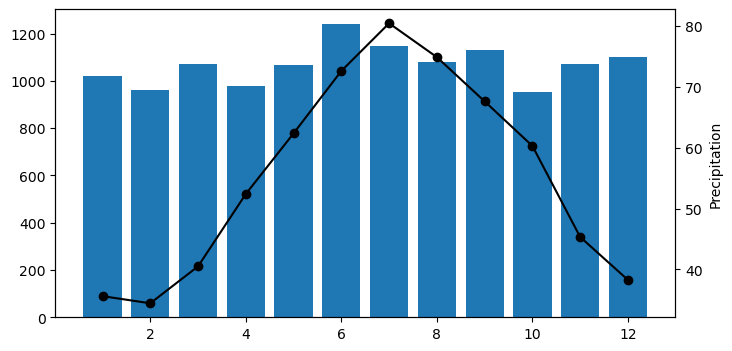

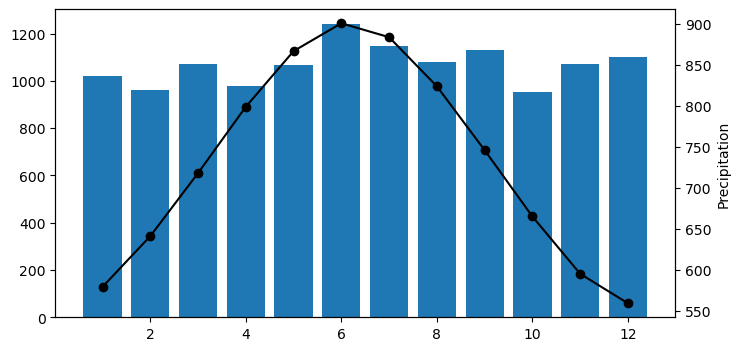

Year - 2014
-0.007525847919453359
0.49944828472516306
0.2094590852251228


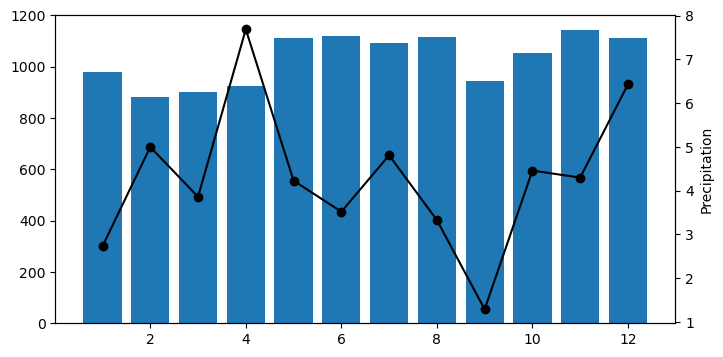

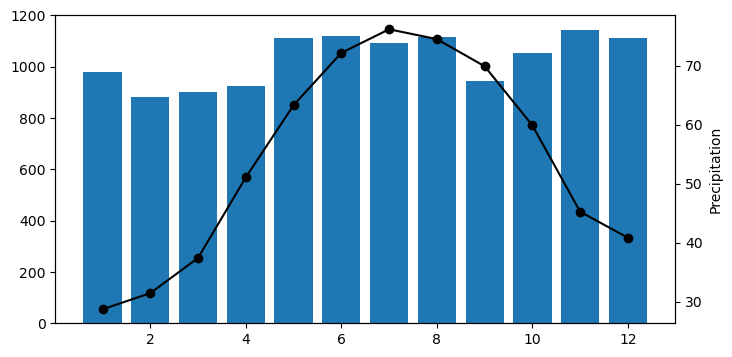

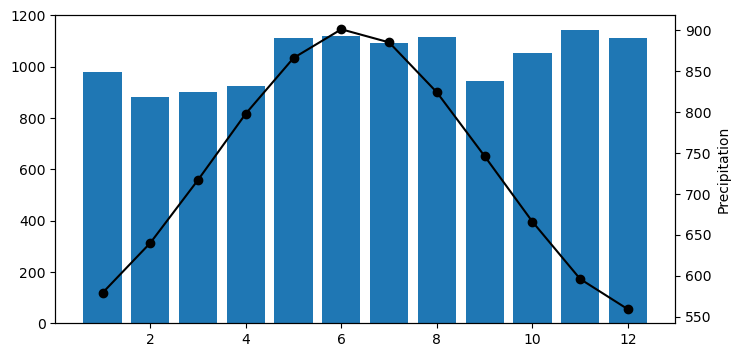

Year - 2015
-0.10101389153860882
0.8053690813895327
0.34790282979653836


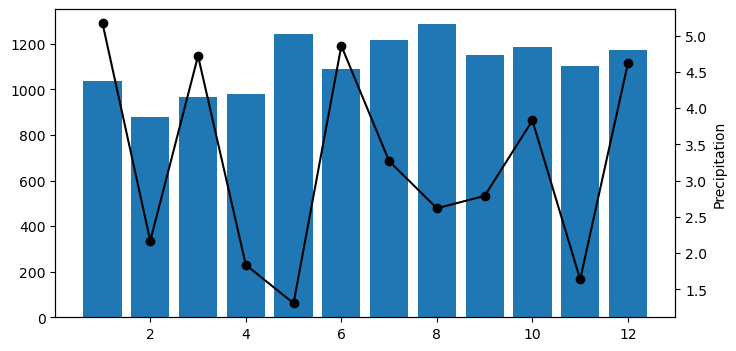

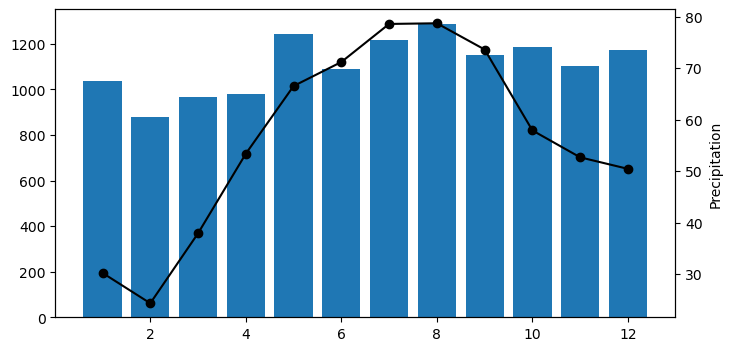

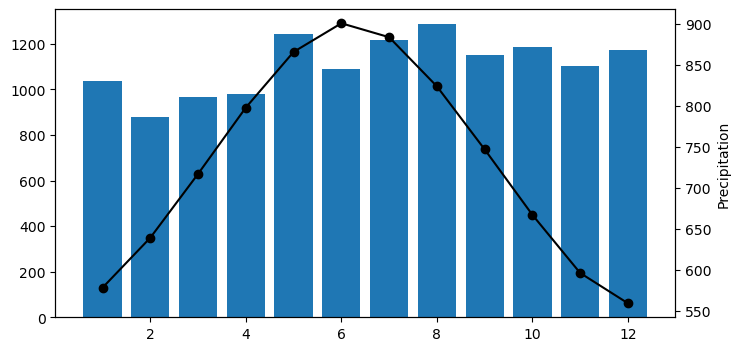

Year - 2016
0.49522113240177057
0.5273903906877158
0.36028570346897837


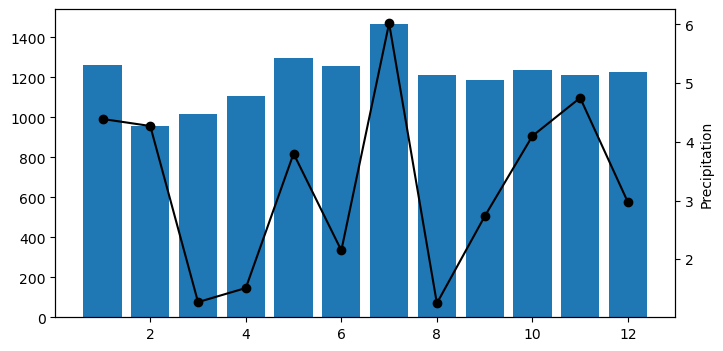

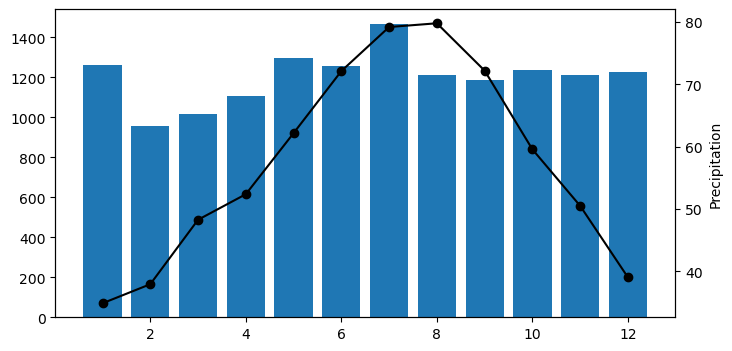

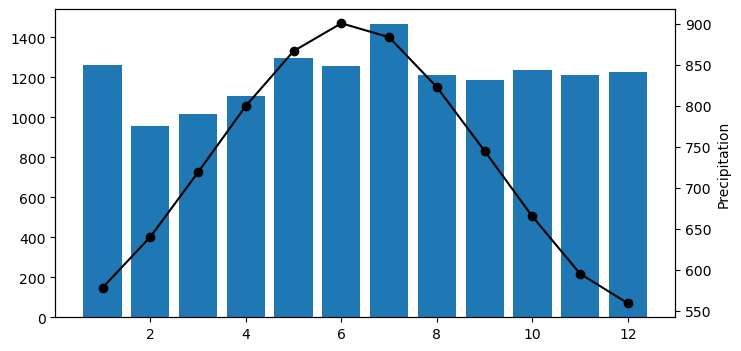

Year - 2017
0.36720082482666516
0.25009910653041906
0.4099547830818516


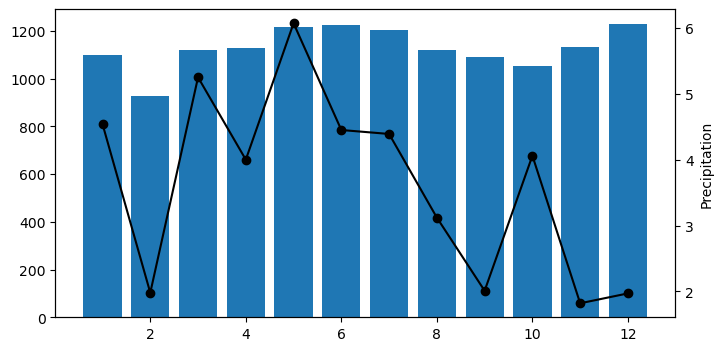

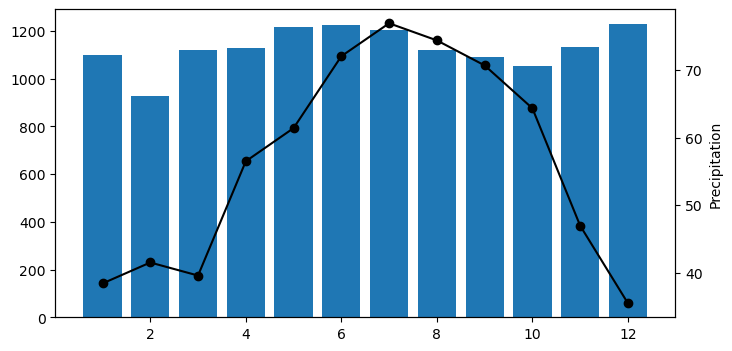

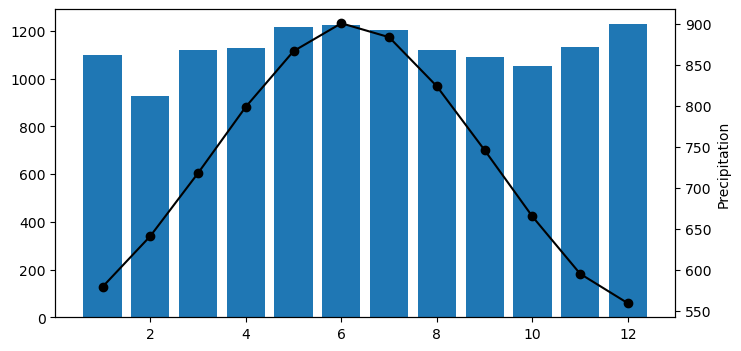

Year - 2018
0.0756401299076366
0.623237621496069
0.38103941020277915


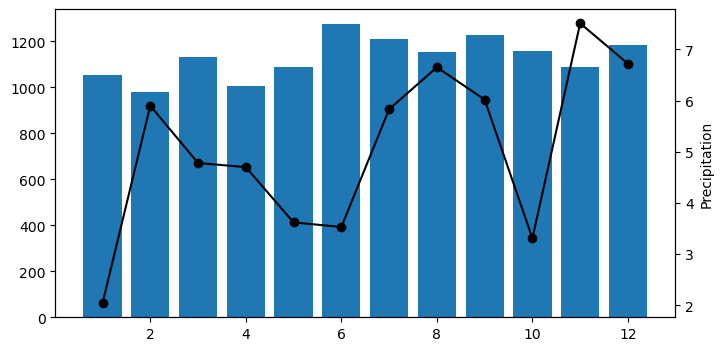

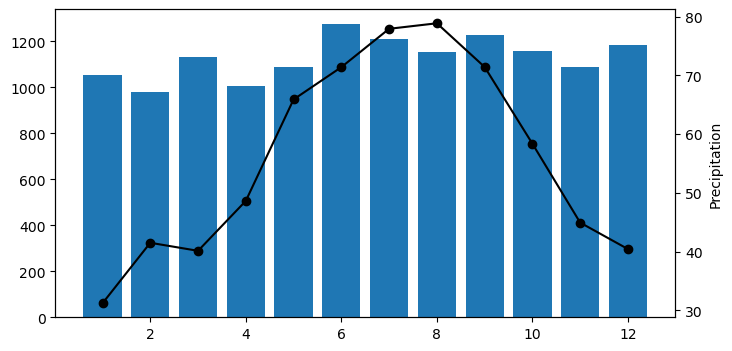

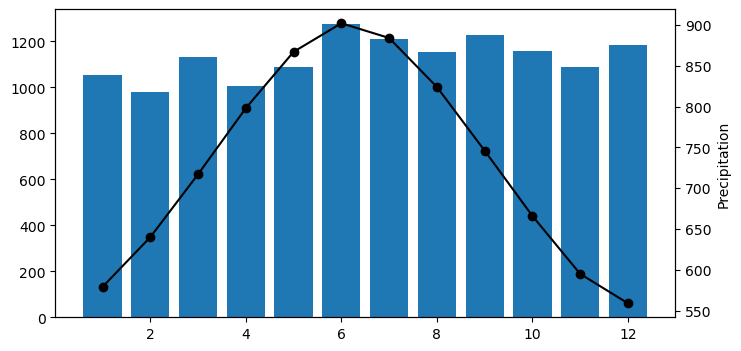

Year - 2019
0.14794735298332604
0.5431715417382577
0.4858279255047328


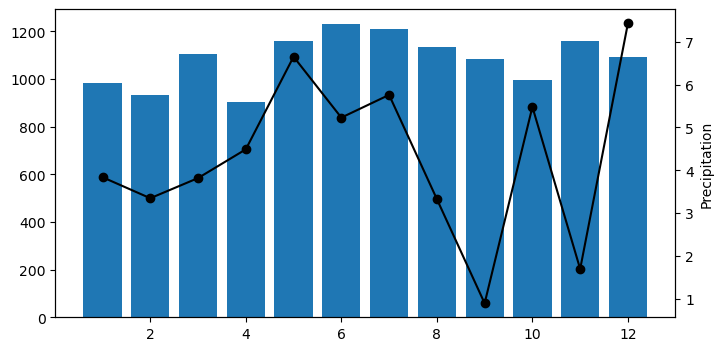

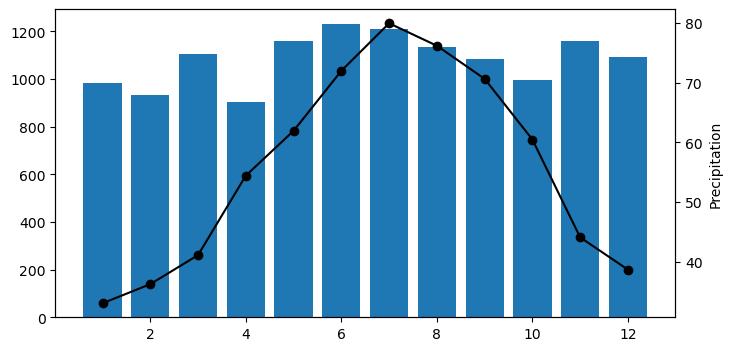

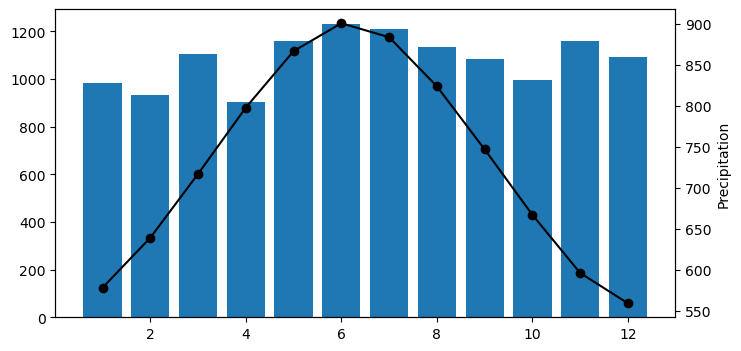

+-------------------------+
+-------------------------+
MORNING
Year - 2013
0.08672277738455672
-0.24524112850765842
-0.16281486814308538


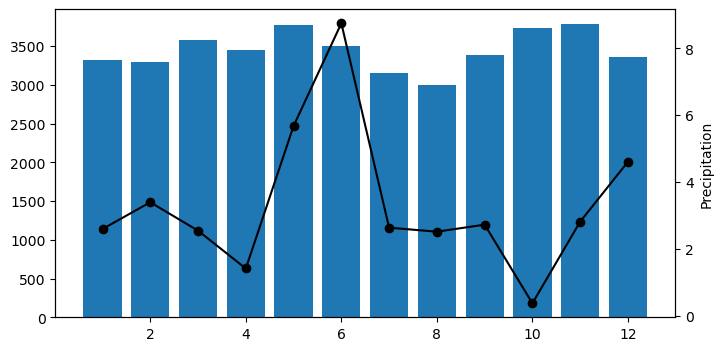

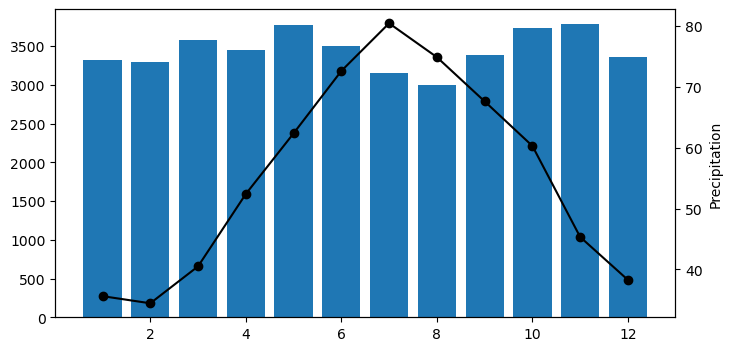

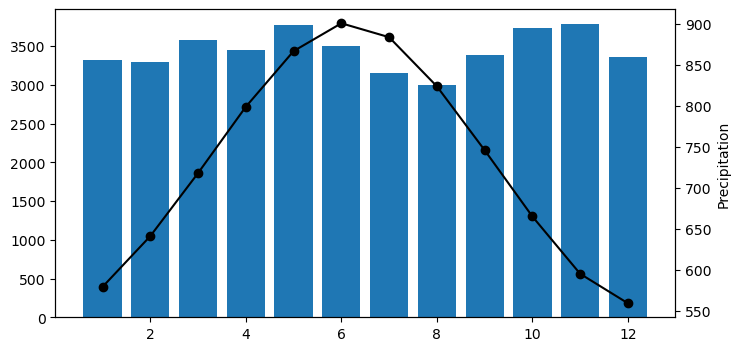

Year - 2014
-0.4167105593880939
-0.3029747610985446
-0.3482514600767481


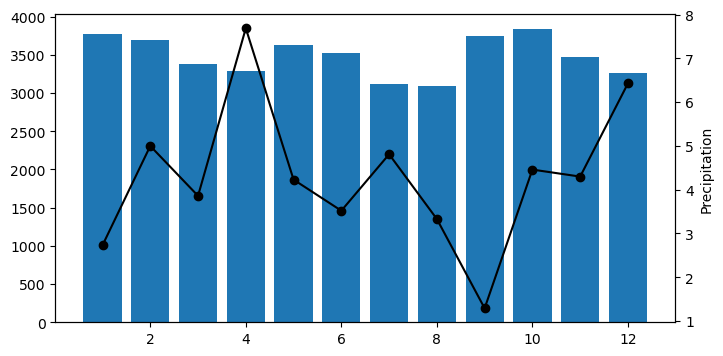

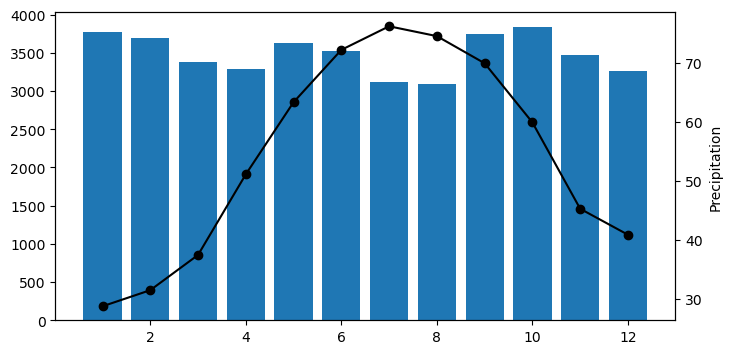

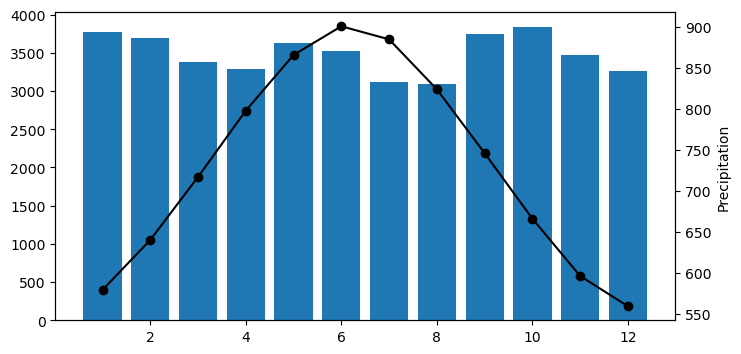

Year - 2015
0.35082275324175055
-0.023790967651436425
-0.25442231615006505


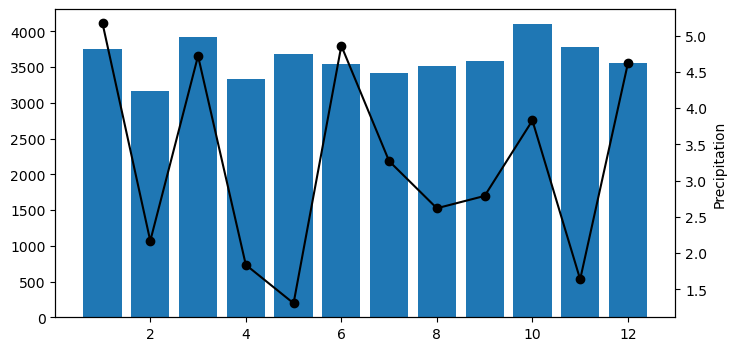

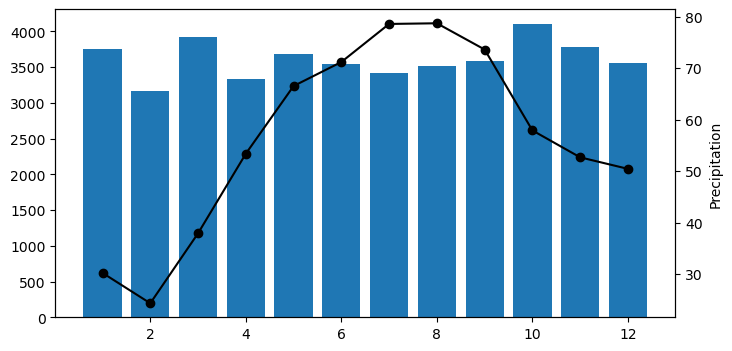

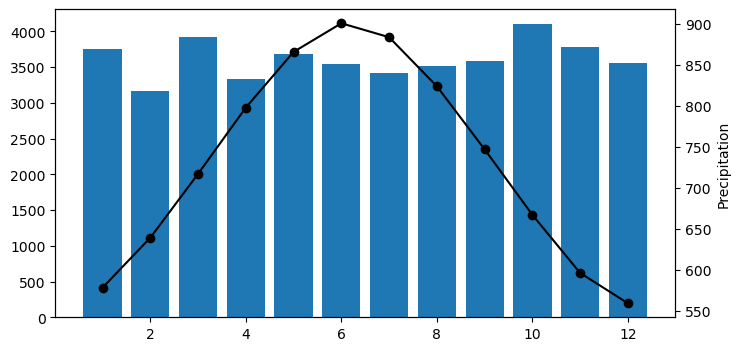

Year - 2016
-0.06796009156899073
-0.49019868060944133
-0.08642549616978625


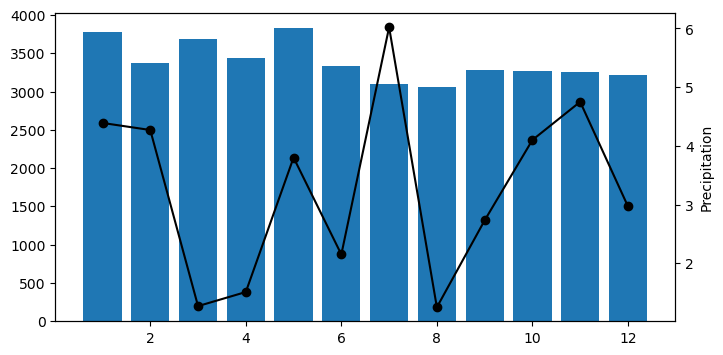

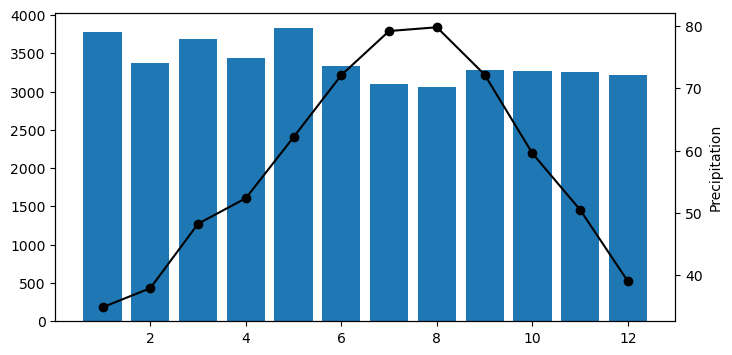

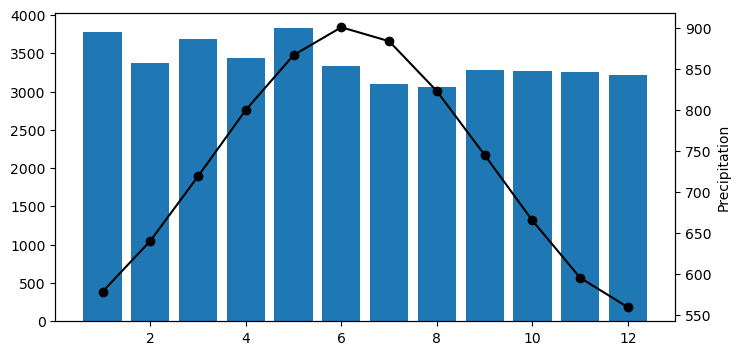

Year - 2017
0.22880289786183147
-0.18336515938262749
-0.04205164248032423


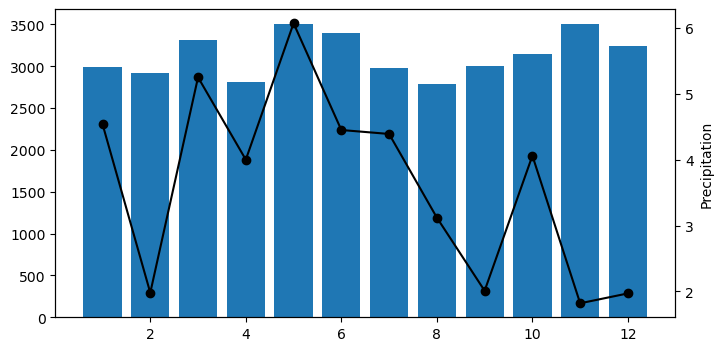

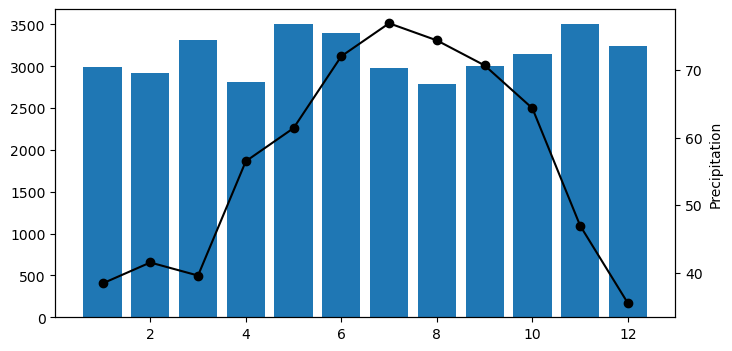

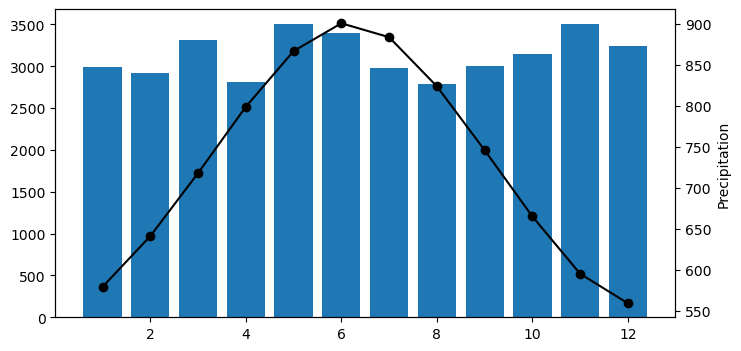

Year - 2018
-0.5352412841102921
0.04506822257153796
0.10790048487131691


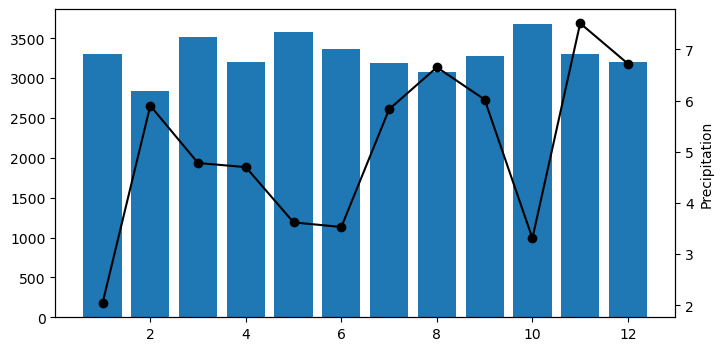

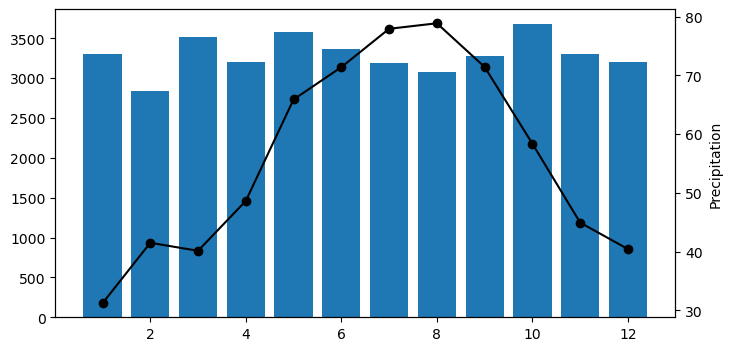

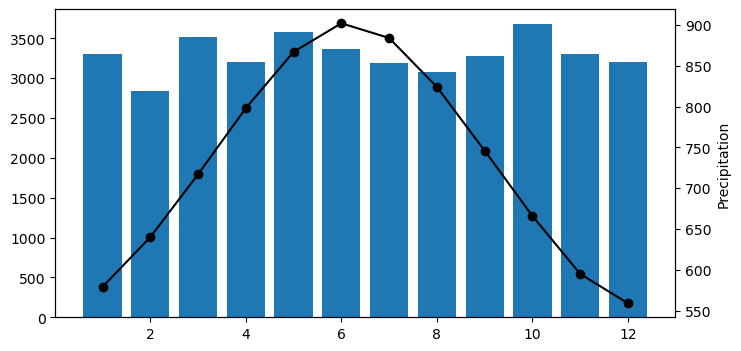

Year - 2019
0.14703699409145954
-0.004437477964179068
0.2198252958825902


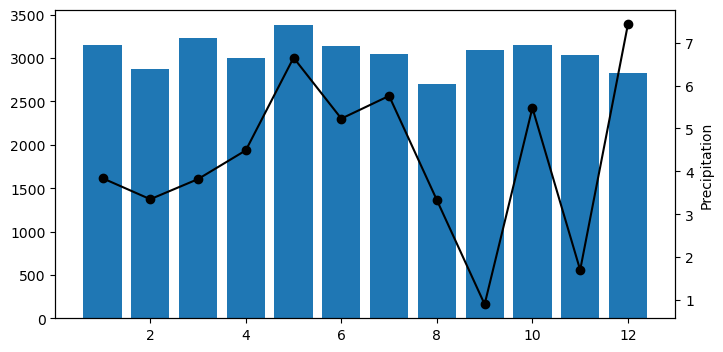

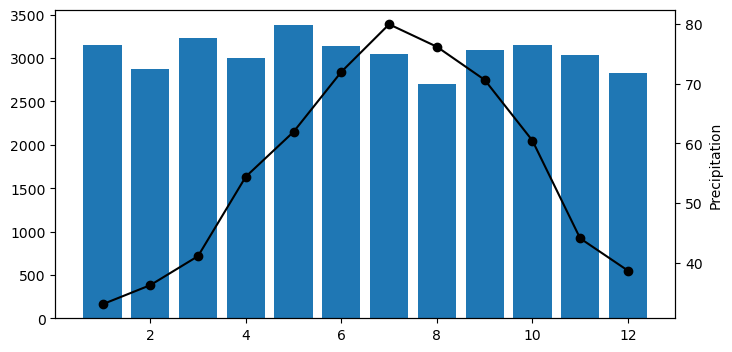

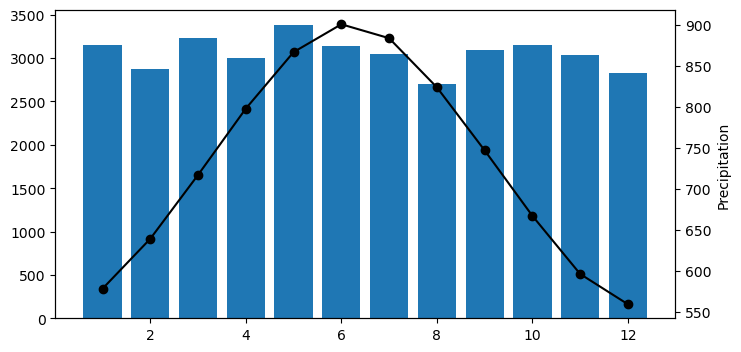

+-------------------------+
+-------------------------+
AFTERNOON
Year - 2013
0.3530296018290465
0.5596041034939421
0.5327534068173387


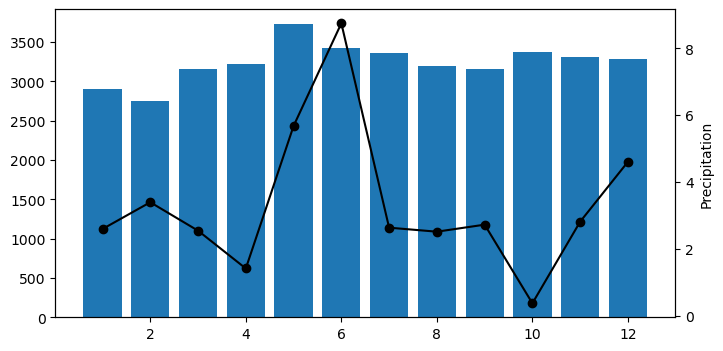

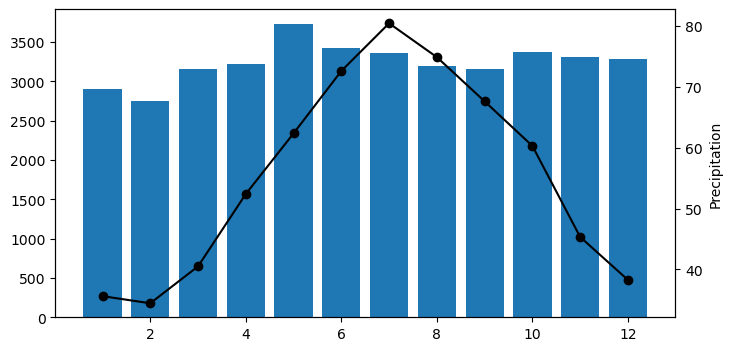

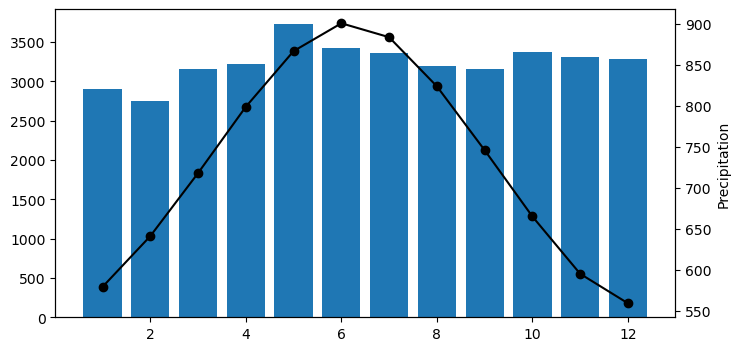

Year - 2014
-0.29618263490089364
0.7074352019862964
0.6076961595043188


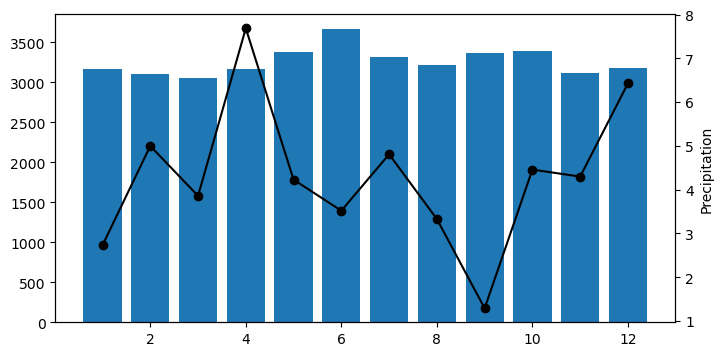

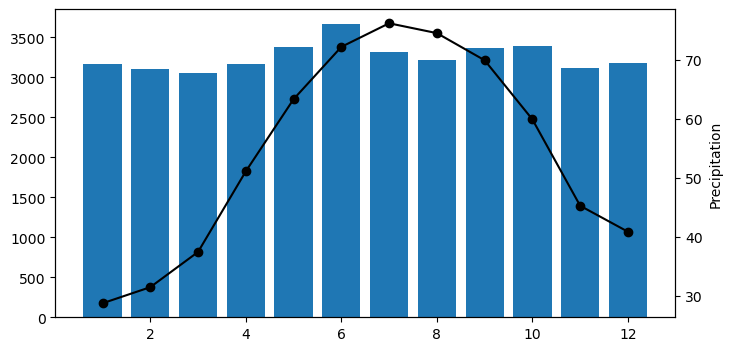

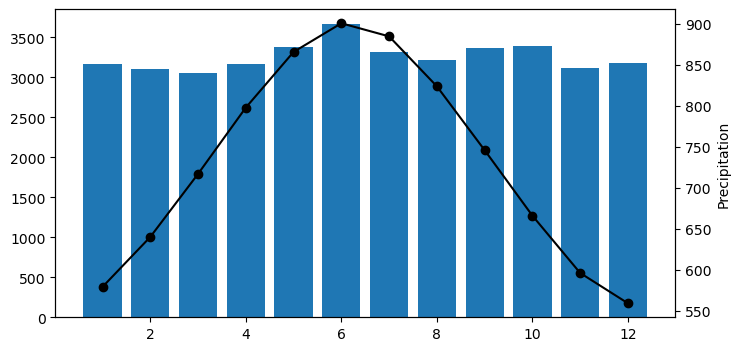

Year - 2015
0.21732924616356308
0.6853516043709585
0.42033597221976376


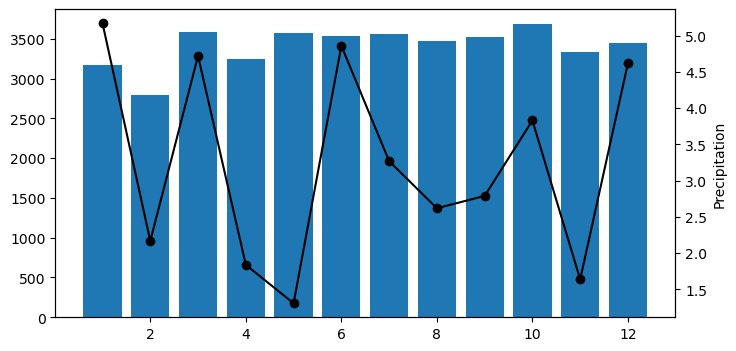

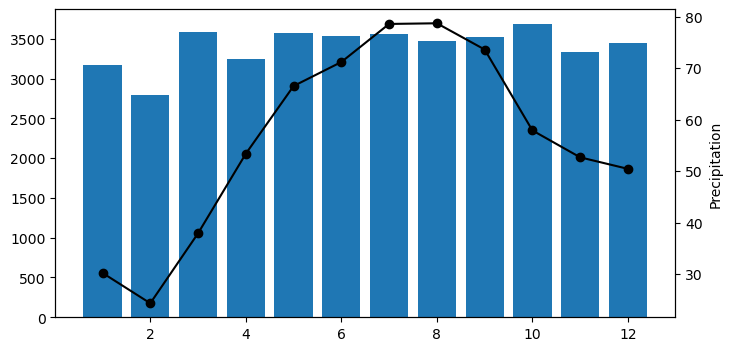

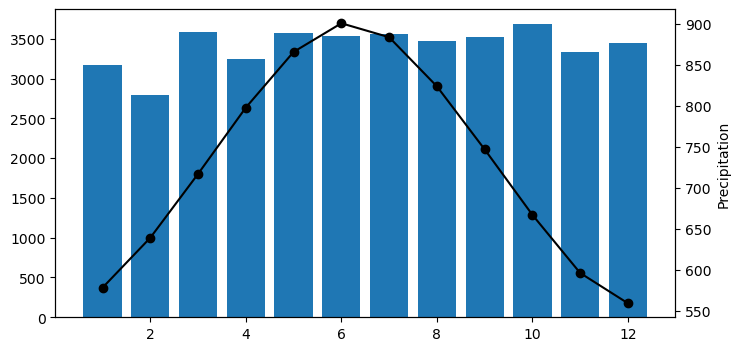

Year - 2016
0.10631304873212832
0.07445307445828034
0.47341741953067523


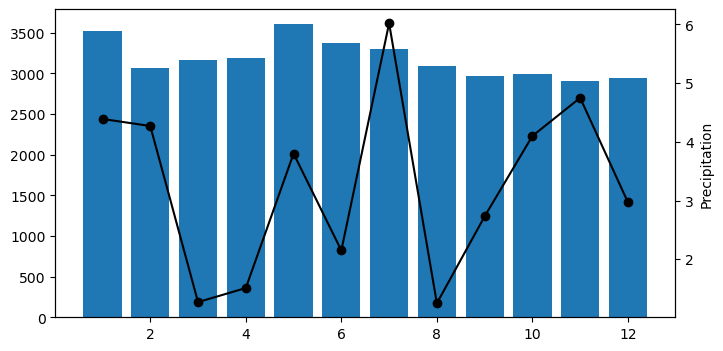

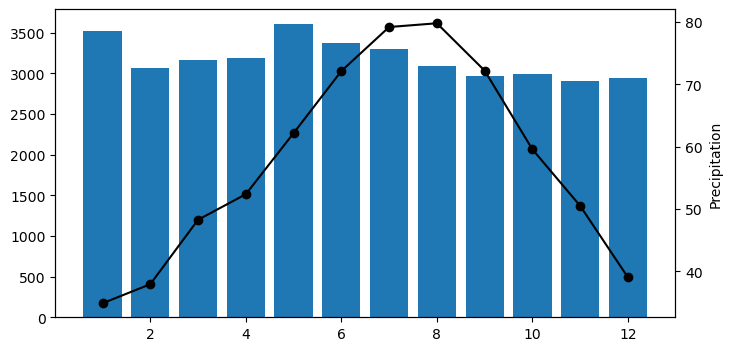

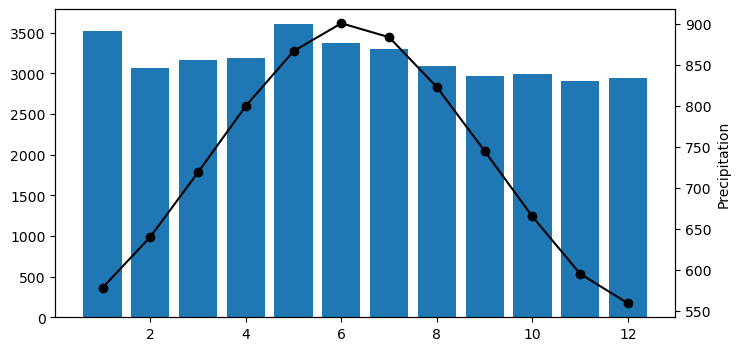

Year - 2017
0.5310399420337727
0.20446920120193604
0.44312124218387866


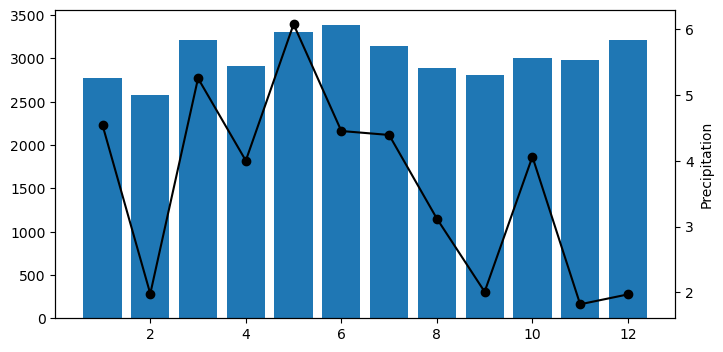

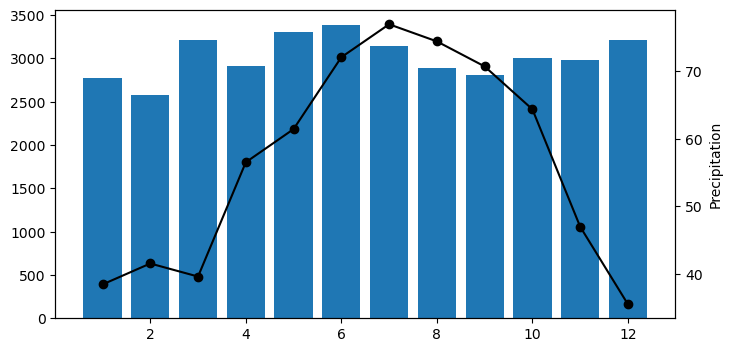

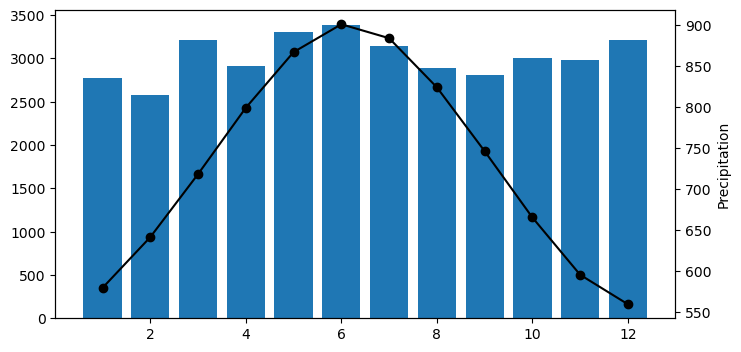

Year - 2018
-0.3411604489713847
0.7390734646439807
0.7030384896923172


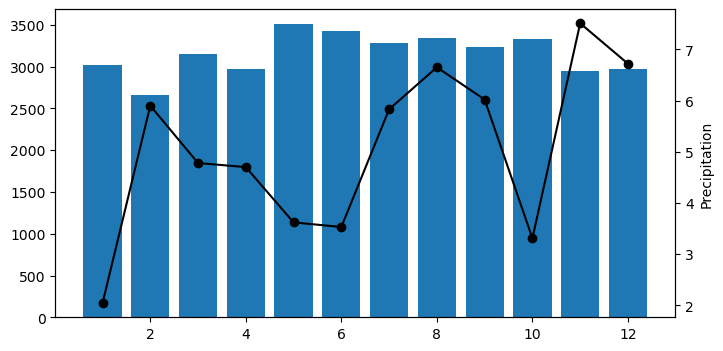

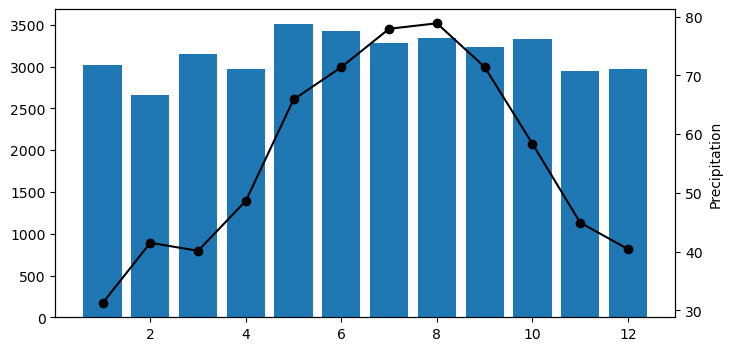

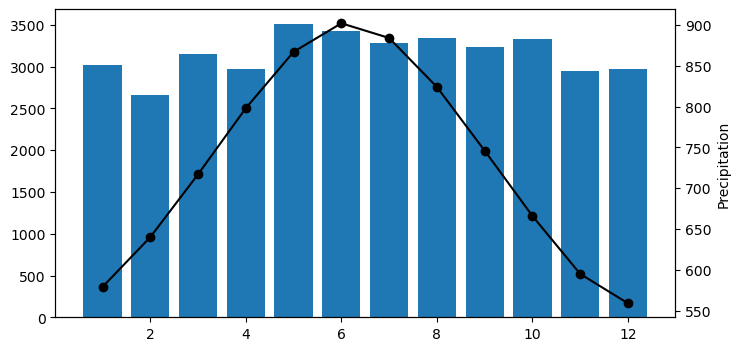

Year - 2019
0.2065421782239833
0.6719528796788914
0.8461211599525158


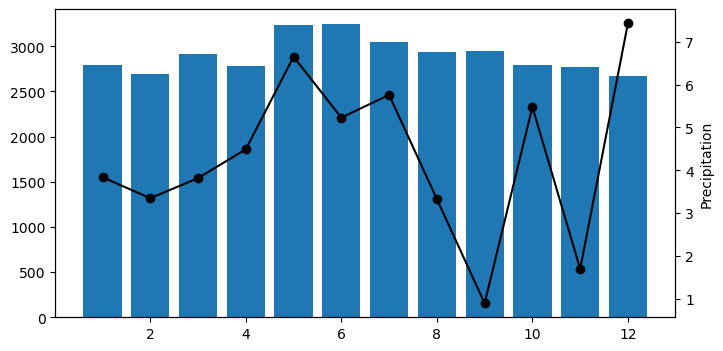

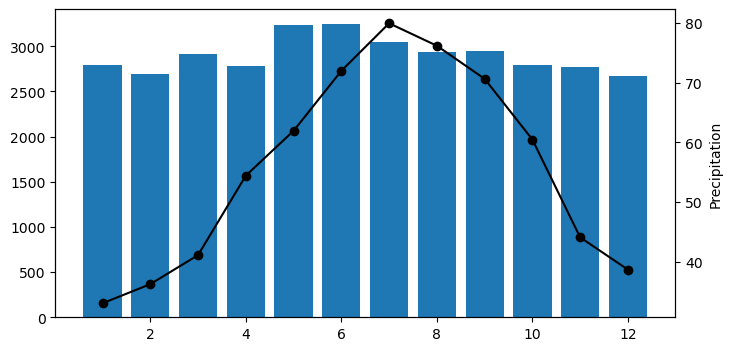

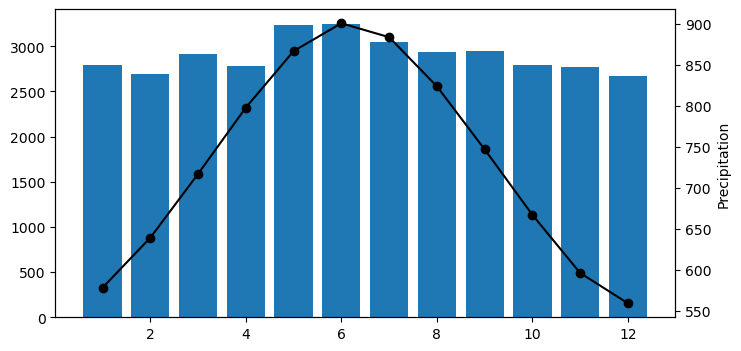

+-------------------------+
+-------------------------+
EVENING
Year - 2013
0.4702152052120923
0.6879479039837523
0.5751465359582213


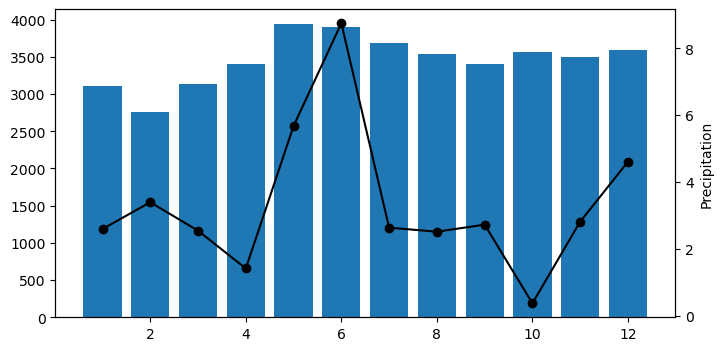

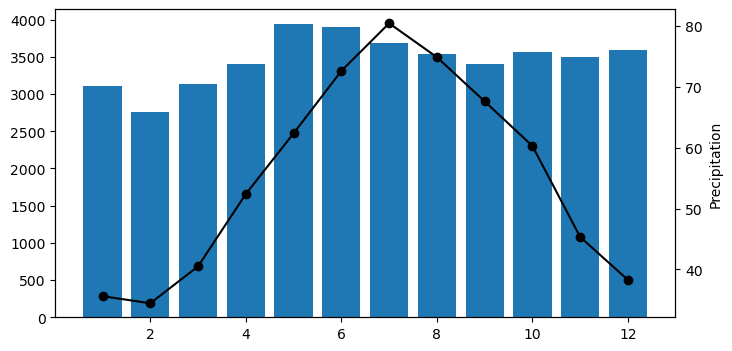

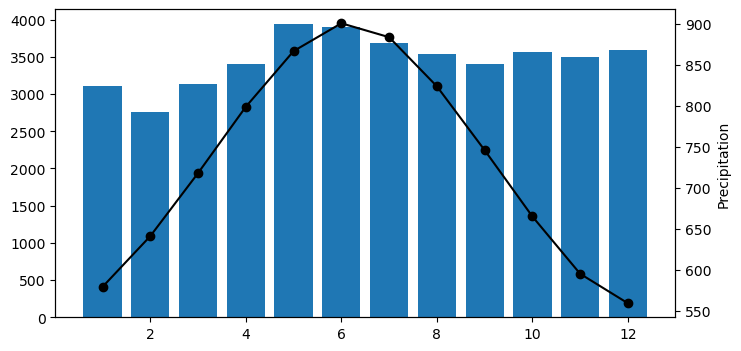

Year - 2014
-0.21419839025251194
0.8239124196701807
0.5650101228730179


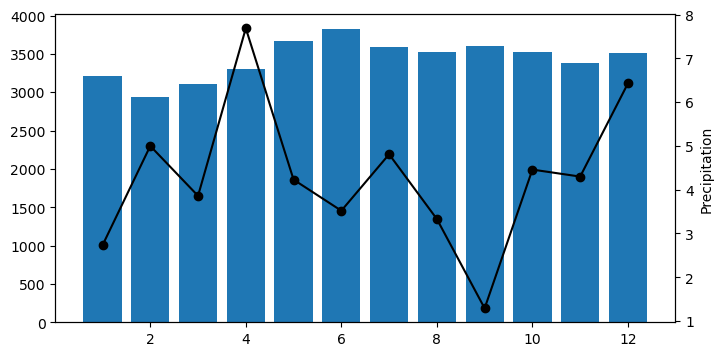

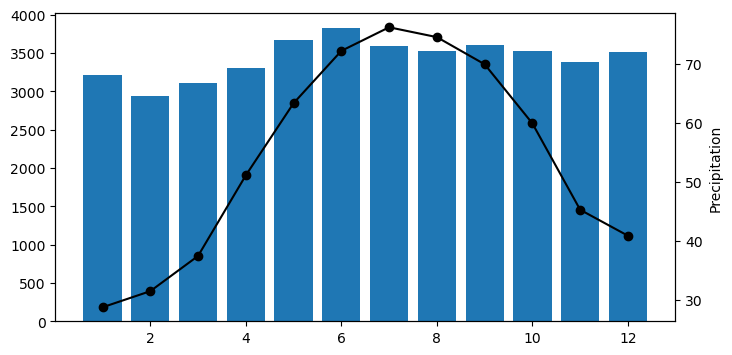

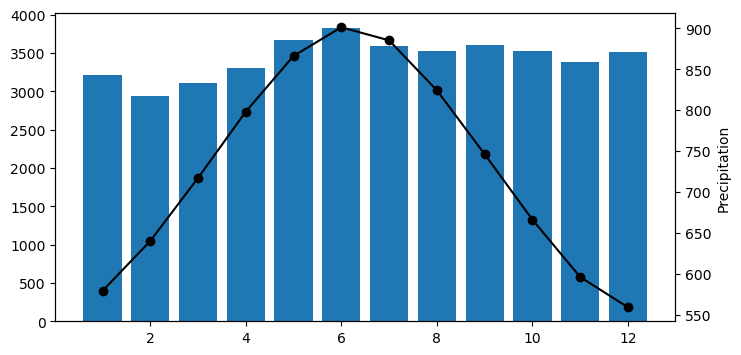

Year - 2015
0.010419043963706787
0.8276207829506816
0.5026288521979808


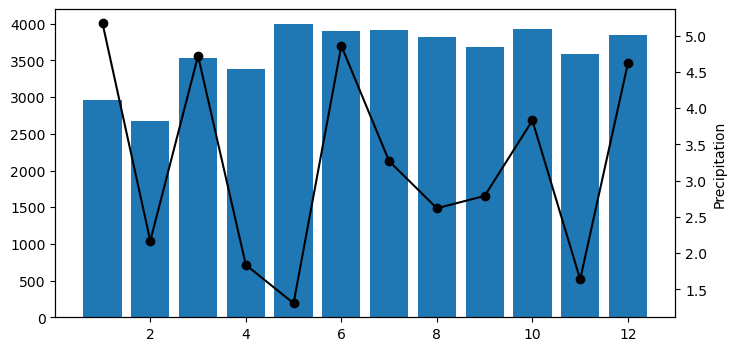

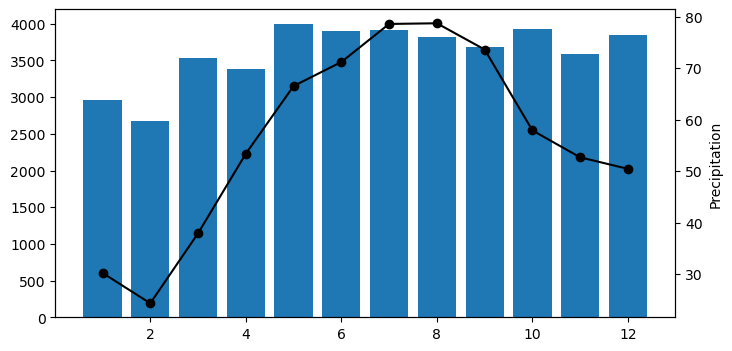

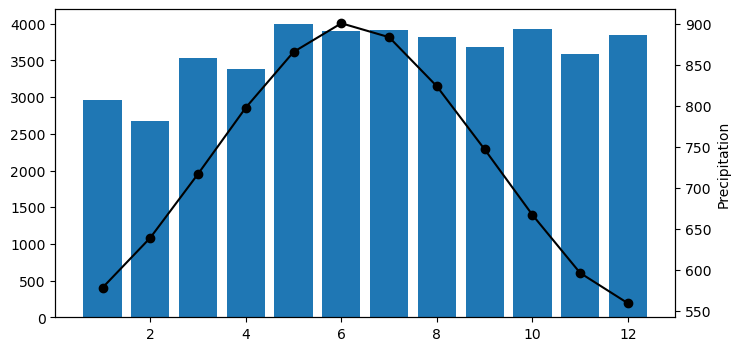

Year - 2016
0.05403597991288825
0.0326030468031104
0.48054280829551815


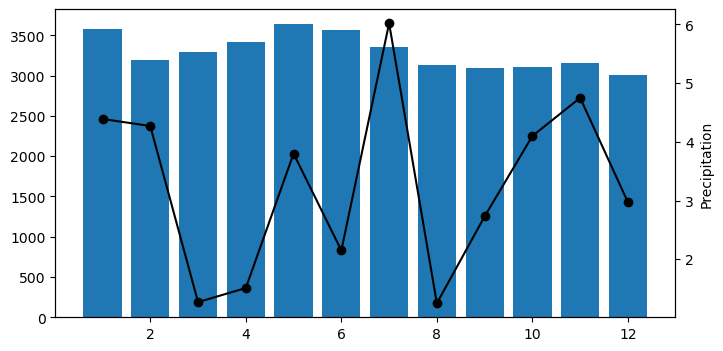

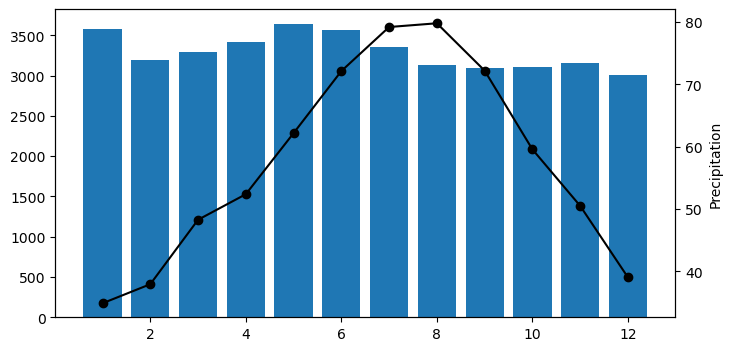

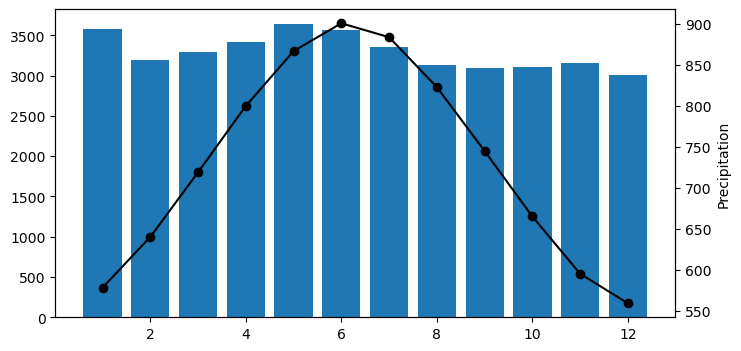

Year - 2017
0.5120073522684374
0.2792013646686929
0.505006430512172


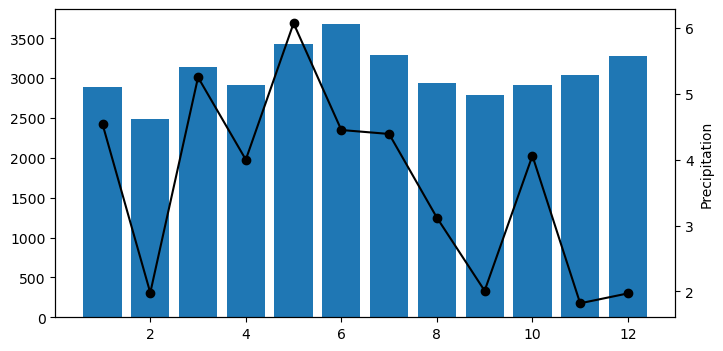

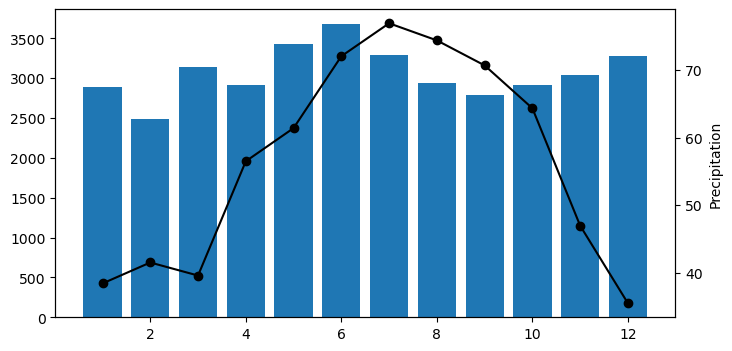

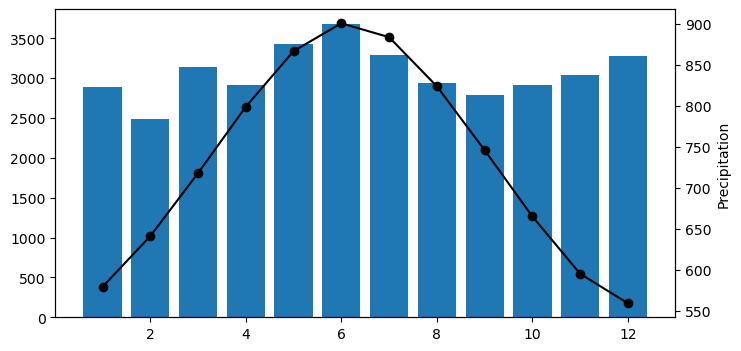

Year - 2018
0.0377753233455735
0.4320747671890667
0.3351592129196695


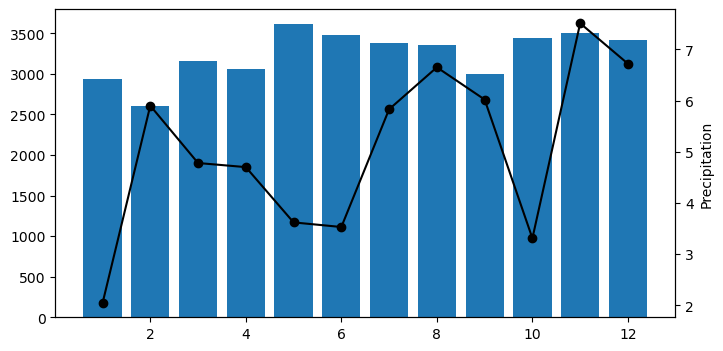

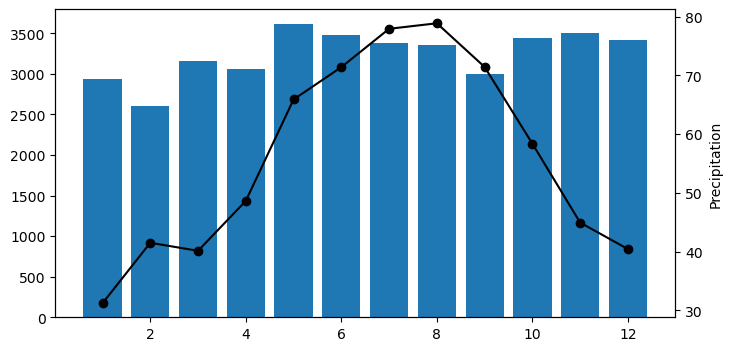

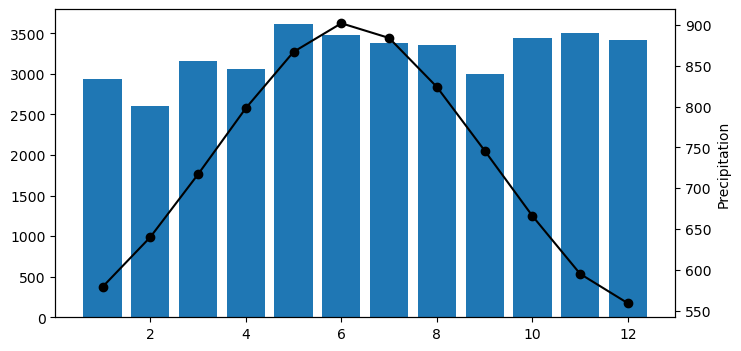

Year - 2019
0.5569225182532576
0.5529433886518881
0.6762539497351767


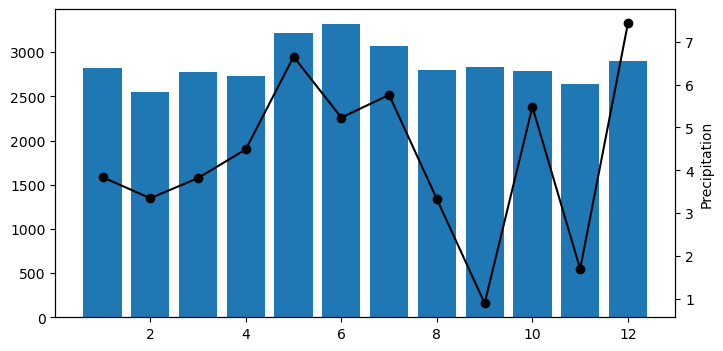

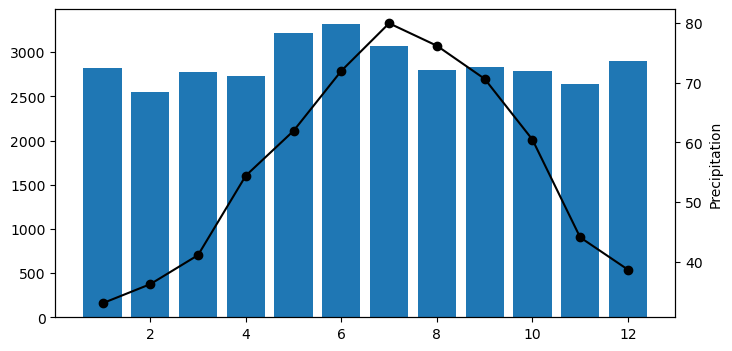

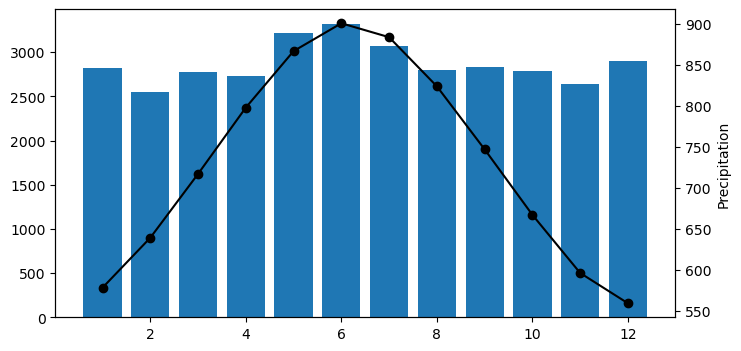

+-------------------------+
+-------------------------+
NIGHT
Year - 2013
0.39522336747532266
0.6617831330890132
0.5333171043893498


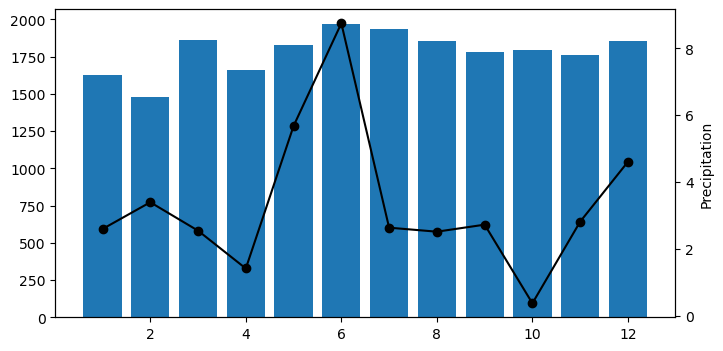

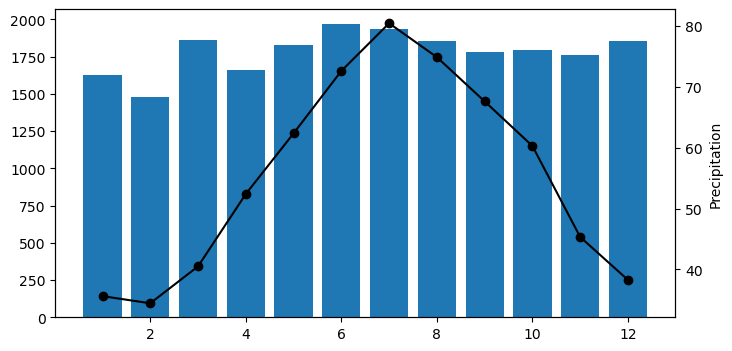

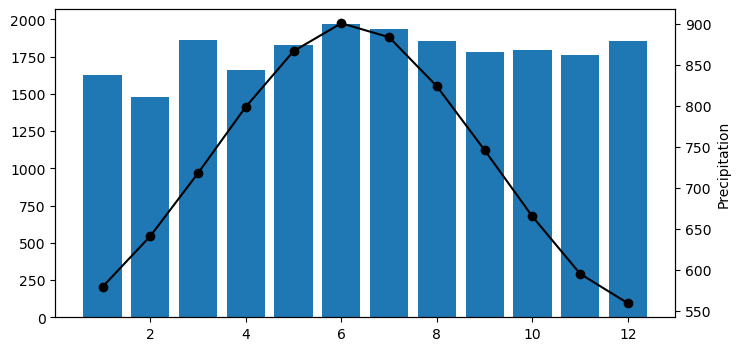

Year - 2014
0.08025515950590534
0.7685050679239125
0.435368086711856


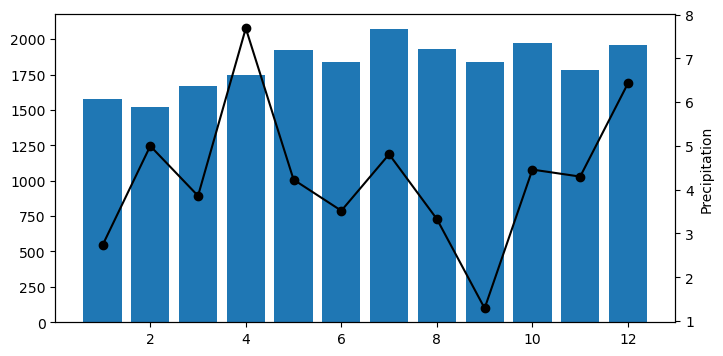

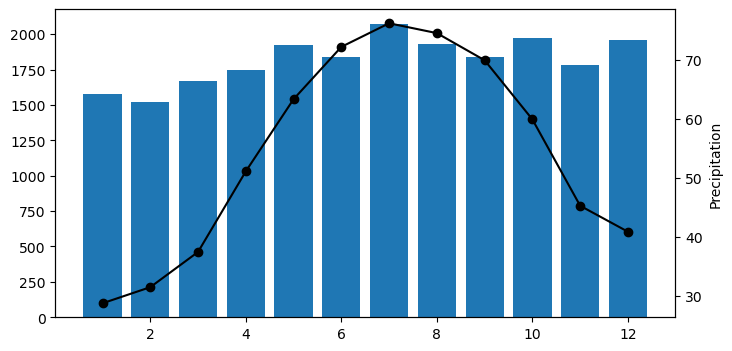

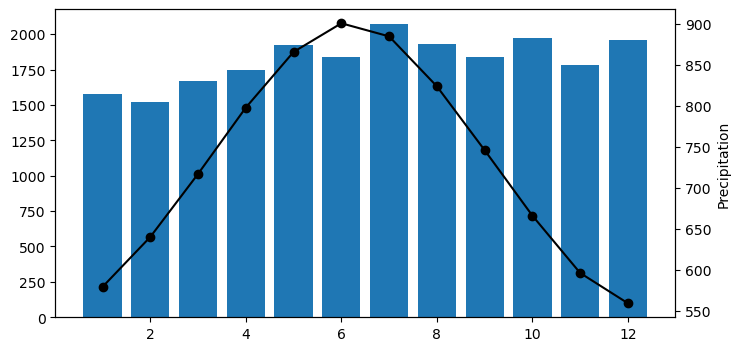

Year - 2015
0.04476501498780864
0.8387412462173723
0.3794032626788023


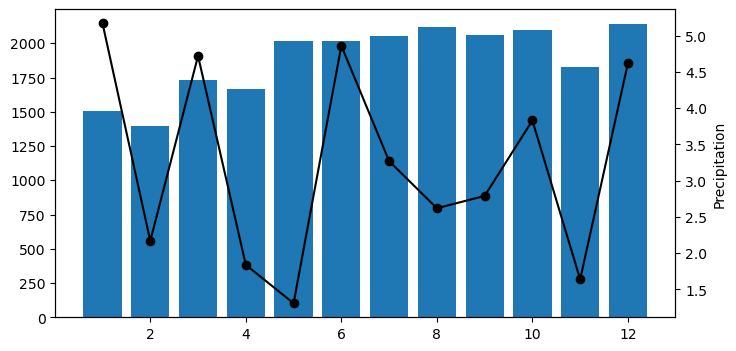

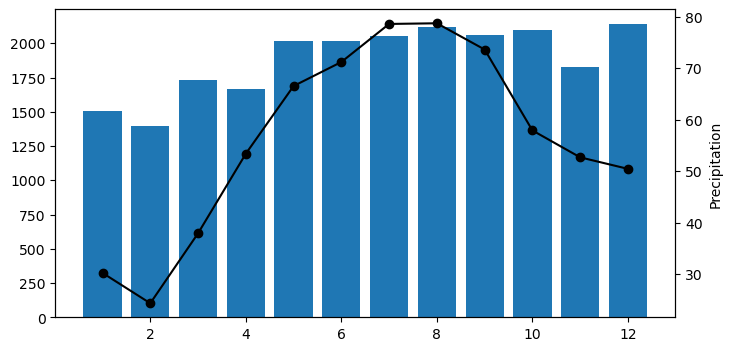

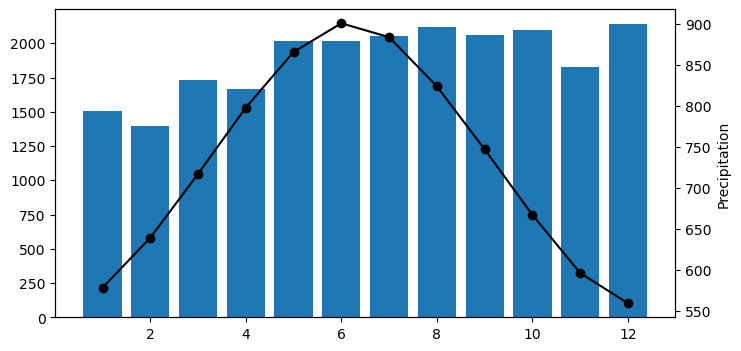

Year - 2016
-0.06608570074630299
0.3753515870461533
0.6895664258069499


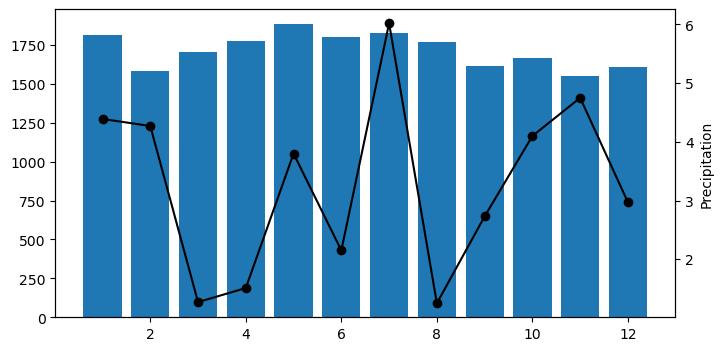

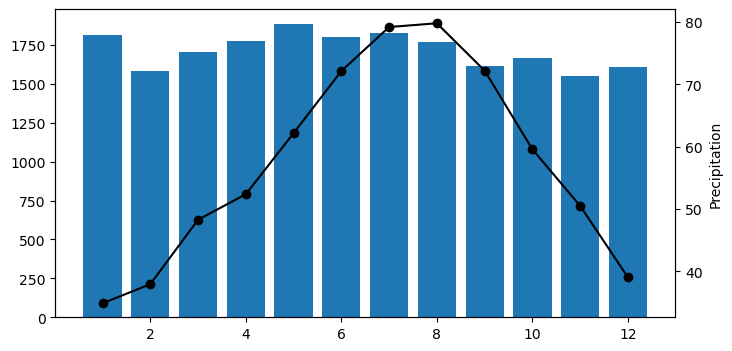

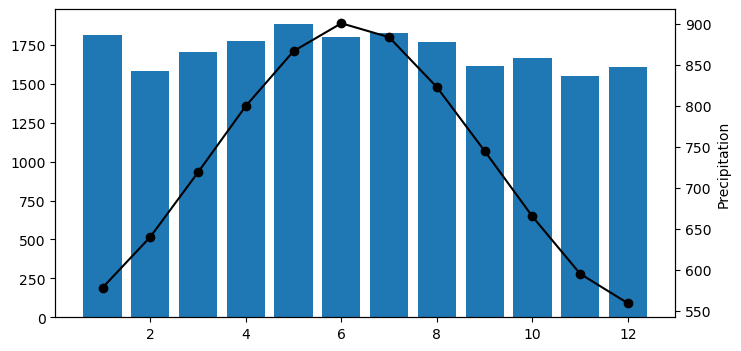

Year - 2017
0.30047122031274254
0.6095263220109464
0.6881324945293475


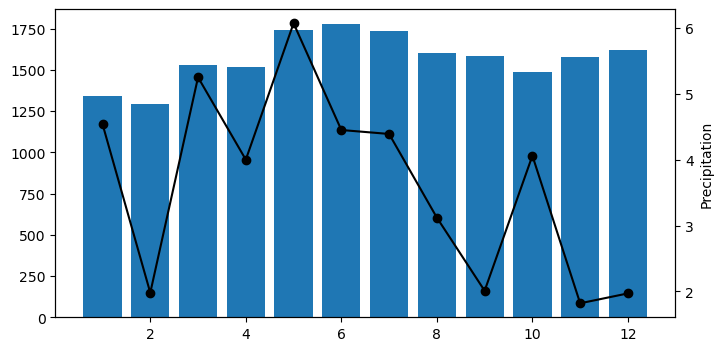

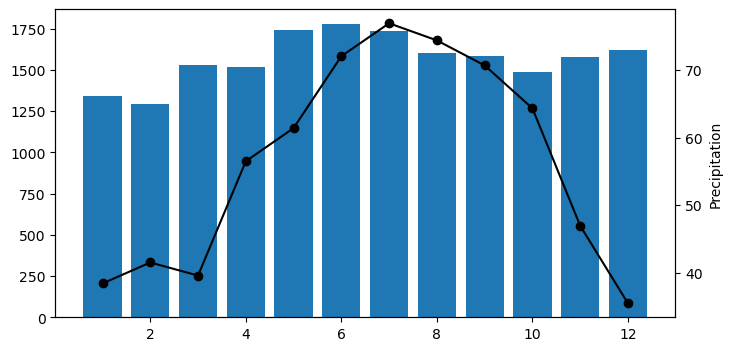

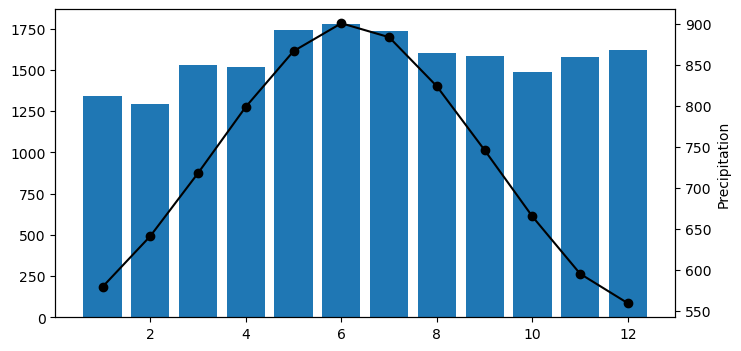

Year - 2018
0.1568778312633951
0.7000193489159856
0.39748209863365924


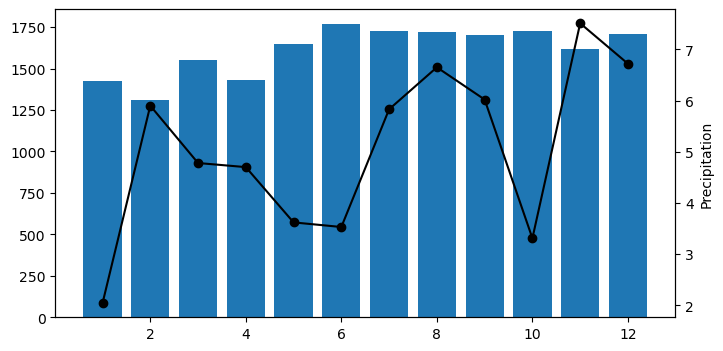

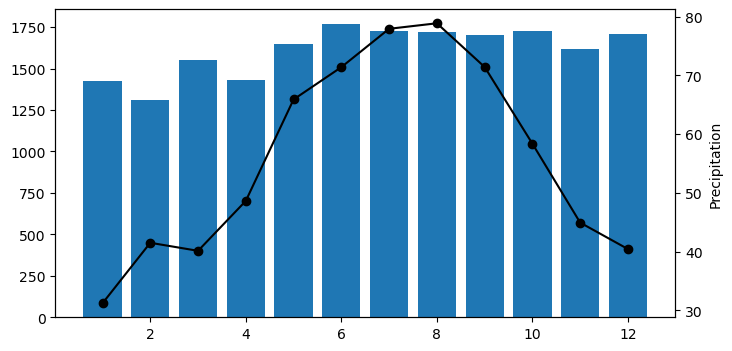

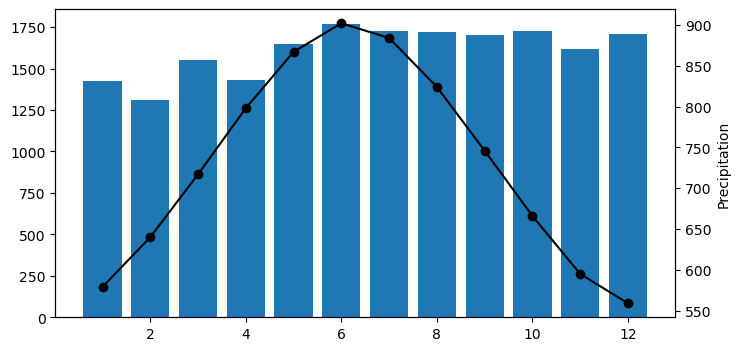

Year - 2019
0.598056628930444
0.6328844312639671
0.5549553292630716


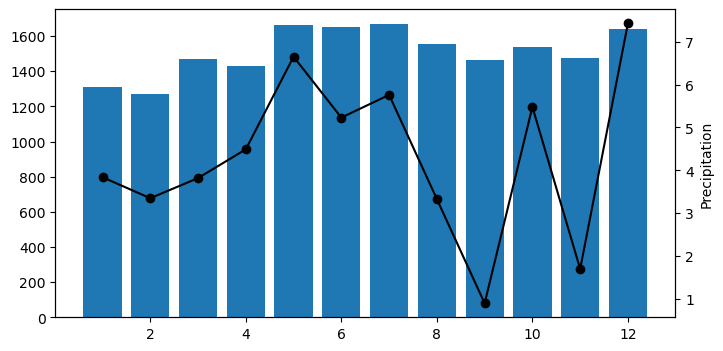

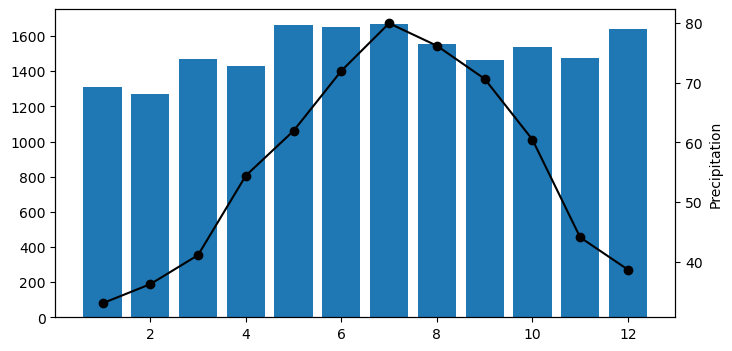

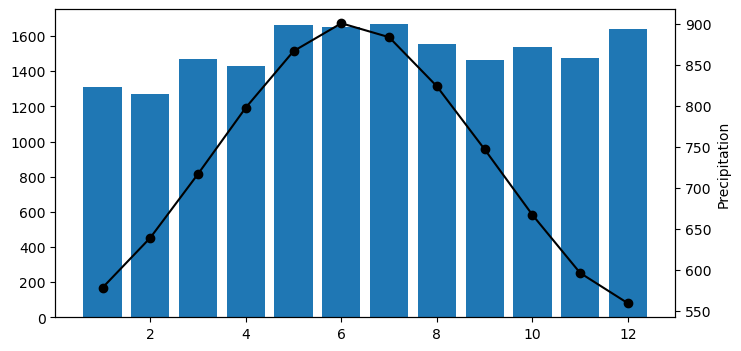

+-------------------------+


In [16]:
plt.rcParams['figure.figsize'] = (10,5)

for time in times:
    datasets_temp = []

    for dataset in datasets:
        datasets_temp.append(dataset[dataset['TIME'] == time])

    transformed_df = getTransformedDataFrame(datasets_temp)

    print("+-------------------------+")
    print(time)

    for i in range(0,73,12):
        print("Year - "+str(2013+(i//12)))
        print(transformed_df['Accidents'][i:i+12].corr(transformed_df['Precipitation'][i:i+12]))
        print(transformed_df['Accidents'][i:i+12].corr(transformed_df['Temperature'][i:i+12]))
        print(transformed_df['Accidents'][i:i+12].corr(transformed_df['Daylight'][i:i+12]))
        
        df_to_plot = transformed_df.loc[:, "Month":"Daylight"][i:i+12]
        getDualPlot(df_to_plot, "Precipitation")
        getDualPlot(df_to_plot, "Temperature")
        getDualPlot(df_to_plot, "Daylight")

    print("+-------------------------+")

Similar to previous, the temperature and the daylight hours are very strong indicators as compared to the precipitation, whose behaviour fluctuates.